# Linear Regression
Try to find a function that can predict the temperature by using salnty.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sympy import diff, symbols, lambdify
from sympy.abc import x, y
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/Users/yuwenchen/Desktop/2190_3685_bundle_archive/bottle.csv')
data = pd.DataFrame(data)

/Users/yuwenchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning
Simply drop the null value.

In [4]:
# predict the water temperature based on salinity
att = data[['T_degC', 'Salnty']]

# remove NAN values
att = att.dropna()

# reset the index
att = att.reset_index(drop=True)

In [5]:
# 0-1 normalization
def normalization (x):
    return (x - min(x)) / (max(x) - min(x))

In [6]:
att['nor_Salnty'] = normalization(att['Salnty'])
att['nor_T_degC'] = normalization(att['T_degC'])

In [7]:
batchSize = 1000

In [8]:
x_data = att['nor_Salnty'].loc[:batchSize].tolist()
y_data = att['nor_T_degC'].loc[:batchSize].tolist()

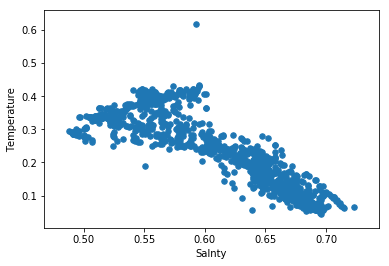

In [9]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()

# Traning Phase
Use Gradient Descent to train the linear model *y = wx + b*.
Randomly generate w and b between -1 and 1.
Use Adagrad for learning rate.

In [10]:
b = 1.06 # initial b
w = -0.6 # initial w
lr = 0.001 # learning rate
iteration = 50000

# store initial vlaues for plotting
b_history = []
w_history = []
loss_history = []

# set the learning rate be different
lr_b = 0
lr_w = 0

x, y, w1, b1 = symbols('x, y, w1, b1')
lossf = (y - (b1 + w1*x))**2
diff_b = lambdify([x, y, w1, b1], diff(lossf, b1))
diff_w = lambdify([x, y, w1, b1], diff(lossf, w1))

# interation start, use gradient descent to find the best b and w that can let the output be the least 
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    loss = 0.0

    for n in range(len(x_data)):
        
        # compute the loss
        loss = loss + (y_data[n] - (b + w*x_data[n]))**2
        
        # compute ∂L/∂w 
        b_grad = b_grad + diff_b(x_data[n], y_data[n], w, b)
        
        # compute ∂L/∂b
        w_grad = w_grad + diff_w(x_data[n], y_data[n], w, b)
    
    # use Adagrad for leanring rate
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    if iteration % 1000 == 0:
        print("loss:", loss)
    # print(b, w, loss)
    
    # for plotting
    loss_history.append(loss)
    b_history.append(b)
    w_history.append(w)

loss: 215.38831810277668
loss: 213.91222093434195
loss: 212.8734273415227
loss: 212.02808515015172
loss: 211.29798799219122
loss: 210.64650717108213
loss: 210.05304289710605
loss: 209.50465998527352
loss: 208.99261034455355
loss: 208.5106521657031
loss: 208.05414766881717
loss: 207.61953963937984
loss: 207.20402892450676
loss: 206.8053659868764
loss: 206.42171079743702
loss: 206.0515355383478
loss: 205.69355514277154
loss: 205.34667651818347
loss: 205.009960656654
loss: 204.6825938476341
loss: 204.3638654557678
loss: 204.05315052196346
loss: 203.74989596699353
loss: 203.45360952599412
loss: 203.163850780974
loss: 202.88022382478383
loss: 202.60237120786374
loss: 202.3299689038492
loss: 202.06272209199025
loss: 201.80036160004556
loss: 201.54264088547058
loss: 201.2893334585861
loss: 201.04023067112237
loss: 200.79513980875117
loss: 200.55388243804694
loss: 200.31629296759434
loss: 200.08221739027684
loss: 199.85151217962905
loss: 199.6240433177914
loss: 199.39968543638807
loss: 199.178

loss: 166.36567975434815
loss: 166.3001659003724
loss: 166.23476222771586
loss: 166.16946827101492
loss: 166.10428356816112
loss: 166.0392076602687
loss: 165.97424009164308
loss: 165.90938040975212
loss: 165.84462816519107
loss: 165.77998291165633
loss: 165.71544420591403
loss: 165.65101160777164
loss: 165.58668468004623
loss: 165.5224629885397
loss: 165.45834610200572
loss: 165.394333592126
loss: 165.3304250334807
loss: 165.2666200035193
loss: 165.2029180825376
loss: 165.139318853647
loss: 165.07582190275087
loss: 165.0124268185167
loss: 164.94913319235204
loss: 164.88594061837748
loss: 164.82284869340174
loss: 164.7598570168977
loss: 164.69696519097778
loss: 164.63417282036815
loss: 164.57147951238628
loss: 164.50888487691705
loss: 164.44638852638911
loss: 164.3839900757504
loss: 164.3216891424487
loss: 164.25948534640463
loss: 164.1973783099927
loss: 164.13536765801882
loss: 164.07345301769607
loss: 164.01163401862547
loss: 163.9499102927739
loss: 163.88828147445275
loss: 163.826747

loss: 147.10143150929238
loss: 147.05949842687008
loss: 147.01760263101886
loss: 146.975744044349
loss: 146.93392258973643
loss: 146.8921381903205
loss: 146.8503907695037
loss: 146.80868025094964
loss: 146.7670065585818
loss: 146.72536961658315
loss: 146.683769349394
loss: 146.64220568171123
loss: 146.60067853848707
loss: 146.5591878449277
loss: 146.51773352649224
loss: 146.47631550889042
loss: 146.4349337180846
loss: 146.39358808028467
loss: 146.35227852194885
loss: 146.31100496978277
loss: 146.26976735073785
loss: 146.2285655920098
loss: 146.1873996210381
loss: 146.14626936550428
loss: 146.10517475333097
loss: 146.06411571268168
loss: 146.02309217195807
loss: 145.98210405980032
loss: 145.94115130508473
loss: 145.90023383692375
loss: 145.85935158466467
loss: 145.8185044778873
loss: 145.77769244640416
loss: 145.7369154202599
loss: 145.69617332972865
loss: 145.65546610531445
loss: 145.61479367774854
loss: 145.5741559779902
loss: 145.53355293722385
loss: 145.49298448686062
loss: 145.4524

loss: 134.24453792506057
loss: 134.21227975160656
loss: 134.1800421008588
loss: 134.1478249439035
loss: 134.11562825189478
loss: 134.08345199605245
loss: 134.0512961476635
loss: 134.01916067808168
loss: 133.98704555872584
loss: 133.95495076108162
loss: 133.9228762566995
loss: 133.89082201719617
loss: 133.8587880142538
loss: 133.82677421961856
loss: 133.79478060510235
loss: 133.76280714258147
loss: 133.7308538039964
loss: 133.69892056135205
loss: 133.667007386718
loss: 133.63511425222634
loss: 133.6032411300735
loss: 133.57138799251956
loss: 133.5395548118879
loss: 133.5077415605639
loss: 133.47594821099682
loss: 133.4441747356978
loss: 133.41242110724113
loss: 133.38068729826298
loss: 133.34897328146081
loss: 133.31727902959523
loss: 133.28560451548705
loss: 133.25394971202022
loss: 133.22231459213836
loss: 133.19069912884655
loss: 133.15910329521117
loss: 133.12752706435958
loss: 133.09597040947804
loss: 133.06443330381484
loss: 133.0329157206772
loss: 133.00141763343268
loss: 132.969

loss: 123.66710121144193
loss: 123.64081694246686
loss: 123.61454584286976
loss: 123.5882878986911
loss: 123.56204309599521
loss: 123.53581142087123
loss: 123.50959285943216
loss: 123.48338739781506
loss: 123.4571950221807
loss: 123.43101571871425
loss: 123.40484947362458
loss: 123.37869627314413
loss: 123.35255610352935
loss: 123.32642895106005
loss: 123.3003148020403
loss: 123.27421364279725
loss: 123.24812545968129
loss: 123.22205023906733
loss: 123.1959879673525
loss: 123.16993863095824
loss: 123.1439022163287
loss: 123.11787870993157
loss: 123.09186809825742
loss: 123.06587036782012
loss: 123.03988550515678
loss: 123.01391349682739
loss: 122.98795432941446
loss: 122.96200798952452
loss: 122.93607446378614
loss: 122.91015373885055
loss: 122.88424580139217
loss: 122.85835063810792
loss: 122.8324682357177
loss: 122.80659858096321
loss: 122.78074166060952
loss: 122.7548974614435
loss: 122.72906597027539
loss: 122.70324717393649
loss: 122.67744105928153
loss: 122.65164761318695
loss: 1

loss: 114.82874917850103
loss: 114.80651349962753
loss: 114.78428712818153
loss: 114.76207005624367
loss: 114.73986227590568
loss: 114.71766377926845
loss: 114.69547455844621
loss: 114.67329460556229
loss: 114.65112391275198
loss: 114.62896247216078
loss: 114.60681027594528
loss: 114.58466731627273
loss: 114.56253358532155
loss: 114.54040907528076
loss: 114.51829377834991
loss: 114.49618768673965
loss: 114.47409079267112
loss: 114.45200308837617
loss: 114.42992456609775
loss: 114.40785521808884
loss: 114.38579503661302
loss: 114.36374401394532
loss: 114.3417021423707
loss: 114.31966941418487
loss: 114.29764582169368
loss: 114.27563135721451
loss: 114.25362601307444
loss: 114.23162978161099
loss: 114.209642655173
loss: 114.18766462611848
loss: 114.16569568681702
loss: 114.14373582964853
loss: 114.12178504700219
loss: 114.09984333127936
loss: 114.0779106748896
loss: 114.05598707025463
loss: 114.03407250980587
loss: 114.01216698598472
loss: 113.99027049124352
loss: 113.96838301804432
loss

loss: 107.2165228120327
loss: 107.19725433751603
loss: 107.1779928544822
loss: 107.15873835795514
loss: 107.13949084296458
loss: 107.12025030454613
loss: 107.10101673774105
loss: 107.08179013759597
loss: 107.06257049916385
loss: 107.04335781750258
loss: 107.02415208767661
loss: 107.00495330475513
loss: 106.98576146381443
loss: 106.96657655993373
loss: 106.94739858820115
loss: 106.92822754370835
loss: 106.90906342155343
loss: 106.88990621683982
loss: 106.87075592467627
loss: 106.85161254017795
loss: 106.83247605846496
loss: 106.81334647466319
loss: 106.79422378390367
loss: 106.77510798132401
loss: 106.75599906206637
loss: 106.73689702127903
loss: 106.71780185411578
loss: 106.6987135557353
loss: 106.67963212130249
loss: 106.66055754598771
loss: 106.64148982496651
loss: 106.62242895342017
loss: 106.60337492653493
loss: 106.5843277395037
loss: 106.56528738752347
loss: 106.54625386579737
loss: 106.52722716953409
loss: 106.50820729394748
loss: 106.48919423425708
loss: 106.47018798568756
loss

loss: 100.85039238858113
loss: 100.83330823887121
loss: 100.8162296305055
loss: 100.79915656006575
loss: 100.78208902413743
loss: 100.76502701930877
loss: 100.74797054217194
loss: 100.73091958932258
loss: 100.71387415735862
loss: 100.69683424288287
loss: 100.67979984250083
loss: 100.66277095282088
loss: 100.64574757045563
loss: 100.62872969202076
loss: 100.61171731413452
loss: 100.59471043341966
loss: 100.57770904650195
loss: 100.56071315000946
loss: 100.5437227405752
loss: 100.52673781483482
loss: 100.50975836942662
loss: 100.49278440099357
loss: 100.47581590618024
loss: 100.45885288163636
loss: 100.44189532401376
loss: 100.42494322996774
loss: 100.40799659615712
loss: 100.39105541924391
loss: 100.37411969589361
loss: 100.35718942277451
loss: 100.34026459655885
loss: 100.32334521392127
loss: 100.30643127154082
loss: 100.28952276609844
loss: 100.27261969427973
loss: 100.25572205277244
loss: 100.23882983826799
loss: 100.22194304746132
loss: 100.20506167705031
loss: 100.1881857237359
los

loss: 94.74426686809493
loss: 94.7290650940013
loss: 94.71386777273764
loss: 94.6986749018983
loss: 94.68348647907939
loss: 94.66830250187952
loss: 94.65312296789925
loss: 94.63794787474082
loss: 94.62277722000908
loss: 94.60761100131083
loss: 94.59244921625465
loss: 94.57729186245142
loss: 94.5621389375139
loss: 94.54699043905697
loss: 94.53184636469793
loss: 94.51670671205571
loss: 94.50157147875144
loss: 94.48644066240813
loss: 94.47131426065093
loss: 94.45619227110757
loss: 94.44107469140643
loss: 94.42596151917967
loss: 94.41085275206032
loss: 94.39574838768382
loss: 94.38064842368763
loss: 94.3655528577108
loss: 94.3504616873954
loss: 94.33537491038445
loss: 94.32029252432376
loss: 94.30521452686064
loss: 94.29014091564486
loss: 94.275071688328
loss: 94.26000684256354
loss: 94.24494637600688
loss: 94.22989028631591
loss: 94.21483857115025
loss: 94.19979122817138
loss: 94.18474825504278
loss: 94.16970964943026
loss: 94.15467540900121
loss: 94.1396455314256
loss: 94.1246200143746
l

loss: 89.69351984670979
loss: 89.67973925575313
loss: 89.6659623888349
loss: 89.65218924414683
loss: 89.63841981988219
loss: 89.62465411423442
loss: 89.6108921253999
loss: 89.59713385157522
loss: 89.58337929095936
loss: 89.5696284417517
loss: 89.55588130215354
loss: 89.54213787036755
loss: 89.52839814459786
loss: 89.5146621230498
loss: 89.50092980393005
loss: 89.48720118544647
loss: 89.47347626580937
loss: 89.45975504322881
loss: 89.4460375159178
loss: 89.43232368208962
loss: 89.4186135399592
loss: 89.40490708774335
loss: 89.3912043236594
loss: 89.37750524592677
loss: 89.36380985276588
loss: 89.35011814239881
loss: 89.33643011304844
loss: 89.32274576293959
loss: 89.30906509029843
loss: 89.2953880933522
loss: 89.28171477032919
loss: 89.26804511945987
loss: 89.25437913897565
loss: 89.24071682710898
loss: 89.2270581820945
loss: 89.21340320216726
loss: 89.19975188556394
loss: 89.1861042305234
loss: 89.17246023528445
loss: 89.15881989808813
loss: 89.1451832171769
loss: 89.13155019079409
los

loss: 84.88486768729418
loss: 84.8723396165
loss: 84.85981469035846
loss: 84.84729290748653
loss: 84.83477426650263
loss: 84.8222587660257
loss: 84.80974640467566
loss: 84.79723718107351
loss: 84.78473109384146
loss: 84.77222814160199
loss: 84.75972832297937
loss: 84.7472316365979
loss: 84.73473808108432
loss: 84.7222476550645
loss: 84.70976035716653
loss: 84.69727618601875
loss: 84.68479514025084
loss: 84.6723172184935
loss: 84.65984241937797
loss: 84.64737074153695
loss: 84.63490218360359
loss: 84.62243674421244
loss: 84.6099744219984
loss: 84.59751521559808
loss: 84.58505912364848
loss: 84.57260614478777
loss: 84.56015627765484
loss: 84.54770952088987
loss: 84.53526587313351
loss: 84.52282533302773
loss: 84.51038789921562
loss: 84.49795357034053
loss: 84.48552234504722
loss: 84.47309422198147
loss: 84.46066919978956
loss: 84.44824727711928
loss: 84.43582845261889
loss: 84.4234127249376
loss: 84.41100009272587
loss: 84.39859055463468
loss: 84.38618410931639
loss: 84.37378075542398
lo

loss: 80.61386668202586
loss: 80.60237733369611
loss: 80.59089069224687
loss: 80.5794067565868
loss: 80.56792552562457
loss: 80.55644699827002
loss: 80.54497117343347
loss: 80.53349805002638
loss: 80.52202762695983
loss: 80.51055990314688
loss: 80.49909487750064
loss: 80.4876325489343
loss: 80.47617291636308
loss: 80.46471597870207
loss: 80.45326173486691
loss: 80.44181018377445
loss: 80.43036132434185
loss: 80.4189151554869
loss: 80.40747167612842
loss: 80.3960308851859
loss: 80.38459278157875
loss: 80.37315736422835
loss: 80.36172463205548
loss: 80.35029458398252
loss: 80.33886721893208
loss: 80.32744253582752
loss: 80.31602053359327
loss: 80.30460121115354
loss: 80.29318456743414
loss: 80.28177060136122
loss: 80.27035931186107
loss: 80.25895069786178
loss: 80.24754475829107
loss: 80.23614149207815
loss: 80.2247408981519
loss: 80.21334297544304
loss: 80.20194772288235
loss: 80.1905551394012
loss: 80.17916522393146
loss: 80.1677779754065
loss: 80.15639339275961
loss: 80.14501147492507

loss: 76.35980104459331
loss: 76.3492838370518
loss: 76.3387689603254
loss: 76.32825641355107
loss: 76.31774619586469
loss: 76.3072383064046
loss: 76.2967327443081
loss: 76.28622950871366
loss: 76.27572859876044
loss: 76.26523001358775
loss: 76.25473375233518
loss: 76.24423981414367
loss: 76.23374819815344
loss: 76.22325890350636
loss: 76.21277192934423
loss: 76.20228727480924
loss: 76.19180493904442
loss: 76.18132492119297
loss: 76.17084722039898
loss: 76.16037183580673
loss: 76.14989876656071
loss: 76.13942801180652
loss: 76.12895957069004
loss: 76.11849344235758
loss: 76.10802962595598
loss: 76.09756812063245
loss: 76.0871089255347
loss: 76.07665203981108
loss: 76.06619746261057
loss: 76.05574519308203
loss: 76.0452952303756
loss: 76.03484757364113
loss: 76.0244022220297
loss: 76.01395917469233
loss: 76.00351843078063
loss: 75.99307998944694
loss: 75.98264384984418
loss: 75.97221001112501
loss: 75.96177847244347
loss: 75.95134923295339
loss: 75.94092229180971
loss: 75.93049764816729

loss: 72.74709264417565
loss: 72.73735616654247
loss: 72.727621740396
loss: 72.71788936502801
loss: 72.70815903973121
loss: 72.69843076379844
loss: 72.68870453652244
loss: 72.67898035719689
loss: 72.66925822511578
loss: 72.6595381395735
loss: 72.64982009986436
loss: 72.64010410528367
loss: 72.63039015512689
loss: 72.62067824868964
loss: 72.6109683852683
loss: 72.60126056415892
loss: 72.59155478465888
loss: 72.58185104606521
loss: 72.57214934767592
loss: 72.56244968878887
loss: 72.55275206870242
loss: 72.54305648671526
loss: 72.5333629421268
loss: 72.5236714342364
loss: 72.51398196234413
loss: 72.50429452574998
loss: 72.49460912375504
loss: 72.48492575566009
loss: 72.47524442076642
loss: 72.46556511837586
loss: 72.45588784779073
loss: 72.44621260831342
loss: 72.436539399247
loss: 72.42686821989444
loss: 72.41719906955942
loss: 72.40753194754633
loss: 72.39786685315896
loss: 72.38820378570244
loss: 72.3785427444816
loss: 72.36888372880229
loss: 72.35922673797005
loss: 72.34957177129121
l

loss: 69.51421910946183
loss: 69.5051489719561
loss: 69.4960806629955
loss: 69.48701418198765
loss: 69.47794952834
loss: 69.46888670146069
loss: 69.4598257007581
loss: 69.45076652564052
loss: 69.44170917551699
loss: 69.43265364979668
loss: 69.42359994788937
loss: 69.41454806920409
loss: 69.40549801315167
loss: 69.39644977914213
loss: 69.38740336658586
loss: 69.37835877489454
loss: 69.36931600347847
loss: 69.36027505174992
loss: 69.35123591912036
loss: 69.34219860500188
loss: 69.3331631088071
loss: 69.32412942994847
loss: 69.31509756783936
loss: 69.30606752189269
loss: 69.29703929152211
loss: 69.28801287614145
loss: 69.27898827516519
loss: 69.26996548800744
loss: 69.26094451408294
loss: 69.2519253528069
loss: 69.24290800359456
loss: 69.23389246586171
loss: 69.22487873902391
loss: 69.21586682249756
loss: 69.20685671569923
loss: 69.19784841804545
loss: 69.18884192895344
loss: 69.17983724784078
loss: 69.1708343741248
loss: 69.16183330722332
loss: 69.15283404655479
loss: 69.14383659153769
l

loss: 66.35430666256924
loss: 66.34586029042809
loss: 66.33741555066172
loss: 66.32897244277251
loss: 66.32053096626267
loss: 66.31209112063517
loss: 66.30365290539264
loss: 66.29521632003849
loss: 66.28678136407594
loss: 66.27834803700853
loss: 66.26991633834038
loss: 66.26148626757542
loss: 66.25305782421792
loss: 66.24463100777243
loss: 66.23620581774375
loss: 66.22778225363682
loss: 66.21936031495687
loss: 66.21094000120938
loss: 66.20252131190018
loss: 66.19410424653499
loss: 66.18568880462009
loss: 66.17727498566191
loss: 66.16886278916698
loss: 66.16045221464199
loss: 66.15204326159414
loss: 66.143635929531
loss: 66.1352302179597
loss: 66.1268261263881
loss: 66.1184236543243
loss: 66.1100228012764
loss: 66.10162356675292
loss: 66.09322595026237
loss: 66.0848299513139
loss: 66.07643556941655
loss: 66.06804280407958
loss: 66.05965165481263
loss: 66.05126212112572
loss: 66.04287420252844
loss: 66.03448789853147
loss: 66.02610320864517
loss: 66.01772013238016
loss: 66.00933866924743

loss: 63.54975224002626
loss: 63.541838044923864
loss: 63.533925324152655
loss: 63.52601407728604
loss: 63.518104303898504
loss: 63.51019600356411
loss: 63.502289175857165
loss: 63.49438382035263
loss: 63.4864799366251
loss: 63.478577524249665
loss: 63.47067658280137
loss: 63.46277711185563
loss: 63.454879110988045
loss: 63.446982579774335
loss: 63.43908751779057
loss: 63.431193924612714
loss: 63.42330179981692
loss: 63.41541114298003
loss: 63.40752195367853
loss: 63.3996342314893
loss: 63.39174797598943
loss: 63.383863186756095
loss: 63.37597986336675
loss: 63.368098005398885
loss: 63.36021761243041
loss: 63.35233868403931
loss: 63.34446121980358
loss: 63.336585219301895
loss: 63.32871068211237
loss: 63.32083760781386
loss: 63.3129659959854
loss: 63.30509584620595
loss: 63.297227158054916
loss: 63.28935993111149
loss: 63.28149416495542
loss: 63.27362985916666
loss: 63.265767013324954
loss: 63.25790562701072
loss: 63.25004569980434
loss: 63.24218723128599
loss: 63.234330221036885
loss:

loss: 60.82981889617131
loss: 60.822402627892735
loss: 60.81498769365405
loss: 60.80757409308891
loss: 60.800161825831644
loss: 60.79275089151612
loss: 60.78534128977684
loss: 60.777933020248
loss: 60.770526082564125
loss: 60.763120476360335
loss: 60.75571620127116
loss: 60.74831325693174
loss: 60.74091164297746
loss: 60.73351135904332
loss: 60.72611240476501
loss: 60.71871477977803
loss: 60.71131848371841
loss: 60.703923516221835
loss: 60.6965298769245
loss: 60.68913756546277
loss: 60.68174658147277
loss: 60.67435692459142
loss: 60.666968594455
loss: 60.659581590700604
loss: 60.65219591296516
loss: 60.64481156088584
loss: 60.63742853409991
loss: 60.63004683224476
loss: 60.62266645495802
loss: 60.615287401877616
loss: 60.607909672641135
loss: 60.60053326688692
loss: 60.59315818425275
loss: 60.58578442437741
loss: 60.578411986899155
loss: 60.57104087145679
loss: 60.56367107768878
loss: 60.55630260523436
loss: 60.54893545373255
loss: 60.54156962282262
loss: 60.53420511214379
loss: 60.526

loss: 58.10450325405616
loss: 58.097568859817805
loss: 58.09063567066829
loss: 58.08370368629378
loss: 58.07677290637979
loss: 58.06984333061255
loss: 58.0629149586782
loss: 58.05598779026305
loss: 58.0490618250534
loss: 58.042137062735925
loss: 58.03521350299715
loss: 58.02829114552375
loss: 58.02136999000301
loss: 58.01445003612153
loss: 58.00753128356666
loss: 58.00061373202571
loss: 57.993697381185875
loss: 57.98678223073465
loss: 57.979868280359895
loss: 57.97295552974918
loss: 57.966043978590434
loss: 57.95913362657165
loss: 57.95222447338099
loss: 57.94531651870654
loss: 57.93840976223679
loss: 57.93150420366023
loss: 57.92459984266545
loss: 57.91769667894097
loss: 57.910794712176056
loss: 57.903893942059156
loss: 57.89699436827986
loss: 57.890095990527016
loss: 57.883198808489986
loss: 57.876302821858516
loss: 57.86940803032163
loss: 57.862514433569736
loss: 57.8556220312921
loss: 57.8487308231788
loss: 57.84184080891983
loss: 57.834951988205546
loss: 57.82806436072607
loss: 57

loss: 55.64454937160497
loss: 55.6380360017424
loss: 55.631523729670036
loss: 55.625012555114296
loss: 55.618502477802124
loss: 55.611993497460666
loss: 55.60548561381641
loss: 55.598978826596756
loss: 55.59247313552882
loss: 55.58596854033983
loss: 55.57946504075719
loss: 55.57296263650846
loss: 55.56646132732114
loss: 55.55996111292294
loss: 55.55346199304165
loss: 55.54696396740516
loss: 55.540467035741486
loss: 55.53397119777864
loss: 55.52747645324498
loss: 55.520982801868556
loss: 55.514490243377864
loss: 55.50799877750145
loss: 55.50150840396796
loss: 55.49501912250595
loss: 55.4885309328442
loss: 55.48204383471176
loss: 55.47555782783762
loss: 55.46907291195063
loss: 55.46258908678017
loss: 55.456106352055535
loss: 55.4496247075061
loss: 55.443144152861294
loss: 55.43666468785083
loss: 55.43018631220434
loss: 55.42370902565154
loss: 55.417232827922426
loss: 55.41075771874705
loss: 55.404283697855284
loss: 55.39781076497752
loss: 55.391338919844046
loss: 55.38486816218513
loss: 

loss: 53.28283533315169
loss: 53.27671430908544
loss: 53.27059428723261
loss: 53.264475267354314
loss: 53.25835724921201
loss: 53.252240232567225
loss: 53.24612421718125
loss: 53.24000920281568
loss: 53.23389518923215
loss: 53.2277821761924
loss: 53.221670163458434
loss: 53.215559150792096
loss: 53.209449137955176
loss: 53.203340124709825
loss: 53.19723211081852
loss: 53.191125096043145
loss: 53.18501908014623
loss: 53.17891406288995
loss: 53.17281004403682
loss: 53.16670702334973
loss: 53.160605000591126
loss: 53.154503975523745
loss: 53.14840394791054
loss: 53.14230491751415
loss: 53.13620688409786
loss: 53.13010984742476
loss: 53.12401380725774
loss: 53.11791876336023
loss: 53.111824715495494
loss: 53.105731663426916
loss: 53.099639606918046
loss: 53.09354854573259
loss: 53.08745847963408
loss: 53.081369408386045
loss: 53.07528133175259
loss: 53.0691942494977
loss: 53.06310816138512
loss: 53.057023067179
loss: 53.050938966643486
loss: 53.04485585954295
loss: 53.038773745641514
loss:

loss: 51.25793898228022
loss: 51.25214547549717
loss: 51.24635289434296
loss: 51.24056123860525
loss: 51.23477050807196
loss: 51.228980702530556
loss: 51.22319182176909
loss: 51.21740386557541
loss: 51.21161683373749
loss: 51.2058307260434
loss: 51.20004554228132
loss: 51.19426128223942
loss: 51.18847794570607
loss: 51.18269553246944
loss: 51.17691404231786
loss: 51.1711334750403
loss: 51.16535383042494
loss: 51.15957510826035
loss: 51.153797308335434
loss: 51.14802043043892
loss: 51.14224447435972
loss: 51.13646943988661
loss: 51.13069532680854
loss: 51.1249221349148
loss: 51.11914986399449
loss: 51.11337851383639
loss: 51.10760808423021
loss: 51.101838574965214
loss: 51.096069985830745
loss: 51.090302316616324
loss: 51.0845355671116
loss: 51.07876973710603
loss: 51.07300482638936
loss: 51.06724083475119
loss: 51.06147776198181
loss: 51.05571560787072
loss: 51.0499543722081
loss: 51.04419405478381
loss: 51.0384346553881
loss: 51.03267617381124
loss: 51.02691860984328
loss: 51.02116196

loss: 49.197672693500806
loss: 49.192204338450274
loss: 49.186736835827425
loss: 49.18127018544382
loss: 49.175804387111334
loss: 49.17033944064196
loss: 49.16487534584744
loss: 49.15941210253994
loss: 49.15394971053144
loss: 49.14848816963406
loss: 49.143027479660084
loss: 49.13756764042151
loss: 49.13210865173094
loss: 49.12665051340059
loss: 49.121193225242834
loss: 49.115736787070254
loss: 49.11028119869521
loss: 49.10482645993056
loss: 49.099372570589004
loss: 49.093919530482836
loss: 49.088467339425364
loss: 49.08301599722912
loss: 49.07756550370703
loss: 49.07211585867212
loss: 49.06666706193758
loss: 49.061219113316064
loss: 49.05577201262104
loss: 49.05032575966577
loss: 49.044880354263334
loss: 49.03943579622703
loss: 49.03399208537058
loss: 49.028549221507014
loss: 49.023107204449936
loss: 49.017666034013075
loss: 49.01222571000995
loss: 49.006786232254306
loss: 49.00134760055988
loss: 48.995909814740386
loss: 48.99047287460969
loss: 48.98503677998183
loss: 48.9796015306707


loss: 47.19490037852686
loss: 47.18974056256136
loss: 47.18458153212693
loss: 47.17942328705626
loss: 47.174265827182666
loss: 47.16910915233861
loss: 47.163953262357275
loss: 47.15879815707163
loss: 47.15364383631503
loss: 47.14849029992025
loss: 47.14333754772075
loss: 47.138185579549614
loss: 47.133034395240365
loss: 47.12788399462606
loss: 47.122734377540304
loss: 47.11758554381642
loss: 47.11243749328796
loss: 47.10729022578863
loss: 47.1021437411518
loss: 47.096998039211286
loss: 47.09185311980062
loss: 47.086708982753855
loss: 47.08156562790454
loss: 47.076423055086615
loss: 47.0712812641341
loss: 47.06614025488067
loss: 47.061000027160695
loss: 47.05586058080807
loss: 47.05072191565682
loss: 47.045584031541274
loss: 47.04044692829572
loss: 47.035310605754184
loss: 47.03017506375106
loss: 47.02504030212082
loss: 47.01990632069773
loss: 47.01477311931657
loss: 47.009640697811555
loss: 47.00450905601729
loss: 46.999378193768614
loss: 46.994248110899946
loss: 46.989118807246214
los

loss: 45.39665007485896
loss: 45.39176117311458
loss: 45.38687300018967
loss: 45.381985555934364
loss: 45.37709884019818
loss: 45.3722128528317
loss: 45.367327593684806
loss: 45.362443062607575
loss: 45.35755925945044
loss: 45.352676184063384
loss: 45.347793836296674
loss: 45.342912216000734
loss: 45.33803132302582
loss: 45.33315115722264
loss: 45.328271718441364
loss: 45.32339300653244
loss: 45.318515021346634
loss: 45.31363776273425
loss: 45.30876123054627
loss: 45.303885424633044
loss: 45.29901034484543
loss: 45.29413599103415
loss: 45.289262363050284
loss: 45.28438946074422
loss: 45.27951728396694
loss: 45.2746458325697
loss: 45.26977510640323
loss: 45.26490510531869
loss: 45.26003582916696
loss: 45.255167277799345
loss: 45.250299451066894
loss: 45.24543234882079
loss: 45.24056597091241
loss: 45.2357003171929
loss: 45.230835387513565
loss: 45.22597118172586
loss: 45.22110769968125
loss: 45.21624494123121
loss: 45.211382906227115
loss: 45.20652159452066
loss: 45.20166100596328
loss:

loss: 43.61777360811759
loss: 43.61314718976992
loss: 43.608521447076264
loss: 43.60389637990215
loss: 43.59927198811301
loss: 43.59464827157429
loss: 43.59002523015139
loss: 43.58540286371003
loss: 43.58078117211549
loss: 43.57616015523372
loss: 43.57153981293025
loss: 43.566920145070824
loss: 43.56230115152101
loss: 43.55768283214665
loss: 43.55306518681366
loss: 43.548448215387786
loss: 43.54383191773499
loss: 43.53921629372115
loss: 43.534601343212174
loss: 43.5299870660742
loss: 43.52537346217302
loss: 43.5207605313749
loss: 43.516148273546044
loss: 43.51153668855239
loss: 43.50692577626021
loss: 43.50231553653577
loss: 43.49770596924527
loss: 43.49309707425503
loss: 43.488488851431484
loss: 43.48388130064084
loss: 43.47927442174974
loss: 43.474668214624394
loss: 43.47006267913139
loss: 43.46545781513737
loss: 43.460853622508786
loss: 43.456250101112225
loss: 43.45164725081439
loss: 43.44704507148199
loss: 43.44244356298164
loss: 43.437842725180126
loss: 43.433242557944325
loss: 4

loss: 41.9466384160654
loss: 41.94225373825093
loss: 41.93786968865615
loss: 41.93348626715965
loss: 41.92910347364001
loss: 41.92472130797612
loss: 41.92033977004641
loss: 41.915958859729884
loss: 41.9115785769053
loss: 41.9071989214514
loss: 41.902819893247155
loss: 41.89844149217121
loss: 41.89406371810275
loss: 41.88968657092072
loss: 41.88531005050394
loss: 41.88093415673144
loss: 41.87655888948254
loss: 41.872184248635875
loss: 41.86781023407105
loss: 41.86343684566682
loss: 41.85906408330266
loss: 41.85469194685763
loss: 41.85032043621101
loss: 41.845949551242235
loss: 41.841579291830364
loss: 41.83720965785496
loss: 41.8328406491953
loss: 41.828472265730774
loss: 41.82410450734085
loss: 41.819737373905205
loss: 41.815370865303024
loss: 41.81100498141399
loss: 41.80663972211795
loss: 41.80227508729421
loss: 41.79791107682241
loss: 41.79354769058233
loss: 41.7891849284537
loss: 41.78482279031636
loss: 41.780461276049884
loss: 41.776100385534015
loss: 41.77174011864891
loss: 41.76

loss: 40.37868577067616
loss: 40.374523760233835
loss: 40.37036233559973
loss: 40.366201496664154
loss: 40.36204124331683
loss: 40.35788157544806
loss: 40.35372249294785
loss: 40.3495639957064
loss: 40.34540608361395
loss: 40.34124875656052
loss: 40.33709201443646
loss: 40.33293585713214
loss: 40.328780284537515
loss: 40.32462529654329
loss: 40.32047089303952
loss: 40.31631707391666
loss: 40.31216383906519
loss: 40.308011188375445
loss: 40.30385912173804
loss: 40.299707639043355
loss: 40.29555674018191
loss: 40.29140642504431
loss: 40.2872566935209
loss: 40.28310754550265
loss: 40.27895898087996
loss: 40.2748109995435
loss: 40.27066360138412
loss: 40.26651678629238
loss: 40.262370554159084
loss: 40.25822490487494
loss: 40.25407983833087
loss: 40.249935354417666
loss: 40.24579145302623
loss: 40.241648134047395
loss: 40.23750539737199
loss: 40.233363242891194
loss: 40.229221670495924
loss: 40.22508068007707
loss: 40.22094027152568
loss: 40.21680044473291
loss: 40.21266119959006
loss: 40.

loss: 38.87388042073048
loss: 38.8699284344641
loss: 38.86597699511446
loss: 38.86202610258147
loss: 38.85807575676551
loss: 38.854125957566595
loss: 38.850176704884994
loss: 38.846227998620904
loss: 38.84227983867449
loss: 38.83833222494618
loss: 38.83438515733614
loss: 38.83043863574465
loss: 38.8264926600723
loss: 38.82254723021924
loss: 38.818602346086095
loss: 38.814658007573
loss: 38.8107142145807
loss: 38.80677096700946
loss: 38.802828264759746
loss: 38.79888610773232
loss: 38.7949444958276
loss: 38.79100342894617
loss: 38.7870629069886
loss: 38.78312292985553
loss: 38.77918349744764
loss: 38.775244609665606
loss: 38.771306266410136
loss: 38.767368467582024
loss: 38.76343121308179
loss: 38.75949450281057
loss: 38.75555833666882
loss: 38.751622714557584
loss: 38.7476876363777
loss: 38.74375310202997
loss: 38.739819111415414
loss: 38.73588566443476
loss: 38.731952760989266
loss: 38.72802040097956
loss: 38.72408858430694
loss: 38.720157310872395
loss: 38.71622658057679
loss: 38.712

loss: 37.44440723980051
loss: 37.4406515127654
loss: 37.43689629726816
loss: 37.43314159321785
loss: 37.429387400523275
loss: 37.425633719093696
loss: 37.42188054883795
loss: 37.41812788966544
loss: 37.41437574148501
loss: 37.410624104205795
loss: 37.406872977737216
loss: 37.403122361988046
loss: 37.399372256867814
loss: 37.39562266228556
loss: 37.39187357815052
loss: 37.3881250043721
loss: 37.384376940859404
loss: 37.38062938752187
loss: 37.37688234426882
loss: 37.37313581100955
loss: 37.36938978765358
loss: 37.36564427411006
loss: 37.36189927028865
loss: 37.358154776098665
loss: 37.35441079144955
loss: 37.35066731625087
loss: 37.346924350412046
loss: 37.34318189384271
loss: 37.33943994645235
loss: 37.33569850815064
loss: 37.331957578846925
loss: 37.32821715845116
loss: 37.324477246872746
loss: 37.32073784402135
loss: 37.31699894980692
loss: 37.31326056413887
loss: 37.30952268692702
loss: 37.30578531808129
loss: 37.302048457511184
loss: 37.298312105126705
loss: 37.29457626083752
loss:

loss: 36.081818640708086
loss: 36.07824711114946
loss: 36.07467606076203
loss: 36.071105489462596
loss: 36.06753539716816
loss: 36.06396578379551
loss: 36.060396649261634
loss: 36.05682799348333
loss: 36.05325981637772
loss: 36.049692117861575
loss: 36.04612489785214
loss: 36.04255815626615
loss: 36.03899189302086
loss: 36.035426108033285
loss: 36.03186080122034
loss: 36.02829597249929
loss: 36.02473162178711
loss: 36.02116774900108
loss: 36.01760435405812
loss: 36.01404143687557
loss: 36.01047899737066
loss: 36.00691703546049
loss: 36.003355551062356
loss: 35.999794544093426
loss: 35.996234014470986
loss: 35.992673962112384
loss: 35.98911438693494
loss: 35.98555528885588
loss: 35.98199666779254
loss: 35.9784385236624
loss: 35.97488085638284
loss: 35.97132366587118
loss: 35.96776695204491
loss: 35.96421071482144
loss: 35.960654954118176
loss: 35.95709966985283
loss: 35.953544861942646
loss: 35.94999053030527
loss: 35.94643667485812
loss: 35.94288329551901
loss: 35.939330392205314
loss:

loss: 34.76859314599236
loss: 34.76519654153373
loss: 34.7618003862521
loss: 34.75840468007138
loss: 34.75500942291551
loss: 34.75161461470833
loss: 34.74822025537401
loss: 34.7448263448363
loss: 34.7414328830193
loss: 34.73803986984703
loss: 34.73464730524349
loss: 34.731255189132824
loss: 34.727863521438984
loss: 34.724472302086035
loss: 34.721081530998255
loss: 34.71769120809943
loss: 34.71430133331388
loss: 34.71091190656594
loss: 34.70752292777947
loss: 34.704134396878835
loss: 34.70074631378818
loss: 34.6973586784318
loss: 34.69397149073382
loss: 34.69058475061862
loss: 34.68719845801038
loss: 34.68381261283339
loss: 34.680427215012024
loss: 34.677042264470586
loss: 34.67365776113335
loss: 34.67027370492481
loss: 34.66689009576921
loss: 34.66350693359105
loss: 34.6601242183147
loss: 34.65674194986465
loss: 34.65336012816522
loss: 34.649978753141006
loss: 34.64659782471633
loss: 34.64321734281594
loss: 34.639837307364125
loss: 34.636457718285556
loss: 34.63307857550475
loss: 34.62

loss: 33.53541809524865
loss: 33.53218347938066
loss: 33.528949285552905
loss: 33.52571551369547
loss: 33.52248216373831
loss: 33.51924923561185
loss: 33.51601672924605
loss: 33.512784644571056
loss: 33.50955298151707
loss: 33.506321740014336
loss: 33.503090919993035
loss: 33.49986052138338
loss: 33.49663054411559
loss: 33.493400988119895
loss: 33.49017185332652
loss: 33.48694313966596
loss: 33.4837148470683
loss: 33.48048697546404
loss: 33.47725952478339
loss: 33.47403249495671
loss: 33.470805885914366
loss: 33.46757969758665
loss: 33.46435392990415
loss: 33.46112858279706
loss: 33.45790365619601
loss: 33.4546791500313
loss: 33.45145506423345
loss: 33.448231398732936
loss: 33.445008153460186
loss: 33.44178532834576
loss: 33.43856292332019
loss: 33.43534093831391
loss: 33.43211937325759
loss: 33.42889822808171
loss: 33.42567750271688
loss: 33.42245719709376
loss: 33.41923731114285
loss: 33.41601784479486
loss: 33.41279879798037
loss: 33.409580170630086
loss: 33.406361962674644
loss: 33

loss: 32.36993074568557
loss: 32.36684724342818
loss: 32.36376413844488
loss: 32.36068143067135
loss: 32.357599120043155
loss: 32.35451720649582
loss: 32.35143568996508
loss: 32.34835457038664
loss: 32.3452738476959
loss: 32.342193521828804
loss: 32.33911359272081
loss: 32.33603406030777
loss: 32.332954924525296
loss: 32.32987618530919
loss: 32.32679784259522
loss: 32.323719896319055
loss: 32.32064234641647
loss: 32.317565192823224
loss: 32.314488435475184
loss: 32.3114120743081
loss: 32.30833610925787
loss: 32.3052605402603
loss: 32.30218536725123
loss: 32.29911059016645
loss: 32.29603620894192
loss: 32.29296222351357
loss: 32.28988863381733
loss: 32.28681543978894
loss: 32.28374264136449
loss: 32.28067023847988
loss: 32.27759823107112
loss: 32.27452661907412
loss: 32.27145540242482
loss: 32.26838458105934
loss: 32.26531415491367
loss: 32.262244123923885
loss: 32.25917448802593
loss: 32.25610524715594
loss: 32.25303640125
loss: 32.24996795024411
loss: 32.246899894074495
loss: 32.24383

loss: 31.19688120420711
loss: 31.19394788688212
loss: 31.191014942737592
loss: 31.18808237171438
loss: 31.185150173753225
loss: 31.182218348794912
loss: 31.17928689678026
loss: 31.176355817650148
loss: 31.1734251113453
loss: 31.17049477780675
loss: 31.16756481697511
loss: 31.16463522879143
loss: 31.1617060131966
loss: 31.158777170131476
loss: 31.15584869953692
loss: 31.15292060135389
loss: 31.149992875523328
loss: 31.147065521986214
loss: 31.14413854068347
loss: 31.141211931556274
loss: 31.13828569454519
loss: 31.135359829591547
loss: 31.132434336636216
loss: 31.129509215620317
loss: 31.12658446648482
loss: 31.123660089170812
loss: 31.120736083619388
loss: 31.11781244977151
loss: 31.114889187568387
loss: 31.11196629695106
loss: 31.10904377786064
loss: 31.106121630238192
loss: 31.103199854024986
loss: 31.100278449162055
loss: 31.09735741559068
loss: 31.094436753251877
loss: 31.091516462087043
loss: 31.088596542037106
loss: 31.085676993043517
loss: 31.082757815047408
loss: 31.07983900799

loss: 30.164553662166675
loss: 30.161750957192627
loss: 30.158948604863433
loss: 30.156146605124203
loss: 30.15334495792012
loss: 30.150543663196093
loss: 30.147742720897384
loss: 30.144942130969024
loss: 30.14214189335623
loss: 30.139342008004157
loss: 30.13654247485785
loss: 30.133743293862622
loss: 30.13094446496344
loss: 30.128145988105654
loss: 30.125347863234534
loss: 30.12255009029516
loss: 30.119752669232813
loss: 30.116955599992725
loss: 30.114158882520222
loss: 30.11136251676039
loss: 30.108566502658725
loss: 30.105770840160215
loss: 30.1029755292104
loss: 30.100180569754492
loss: 30.09738596173784
loss: 30.09459170510576
loss: 30.091797799803523
loss: 30.089004245776596
loss: 30.08621104297036
loss: 30.08341819133
loss: 30.080625690801043
loss: 30.077833541328822
loss: 30.07504174285887
loss: 30.072250295336428
loss: 30.069459198707094
loss: 30.06666845291616
loss: 30.06387805790913
loss: 30.06108801363153
loss: 30.058298320028776
loss: 30.05550897704637
loss: 30.05271998462

loss: 29.143148132171106
loss: 29.140473248485712
loss: 29.13779869772195
loss: 29.135124479828903
loss: 29.132450594755692
loss: 29.129777042451433
loss: 29.1271038228653
loss: 29.12443093594626
loss: 29.12175838164381
loss: 29.119086159906836
loss: 29.11641427068468
loss: 29.113742713926396
loss: 29.111071489581292
loss: 29.108400597598614
loss: 29.105730037927348
loss: 29.103059810517074
loss: 29.10038991531683
loss: 29.09772035227582
loss: 29.095051121343396
loss: 29.09238222246883
loss: 29.089713655601408
loss: 29.08704542069037
loss: 29.08437751768504
loss: 29.081709946534847
loss: 29.079042707188886
loss: 29.07637579959669
loss: 29.073709223707507
loss: 29.071042979470775
loss: 29.068377066835737
loss: 29.065711485751834
loss: 29.063046236168393
loss: 29.06038131803501
loss: 29.057716731300864
loss: 29.055052475915463
loss: 29.05238855182814
loss: 29.049724958988563
loss: 29.04706169734593
loss: 29.044398766849838
loss: 29.041736167449663
loss: 29.039073899095047
loss: 29.036411

loss: 28.206435326450183
loss: 28.20387645263586
loss: 28.20131789415971
loss: 28.198759650974534
loss: 28.19620172303294
loss: 28.19364411028742
loss: 28.191086812690692
loss: 28.188529830195503
loss: 28.185973162754365
loss: 28.18341681031998
loss: 28.1808607728451
loss: 28.178305050282457
loss: 28.17574964258456
loss: 28.17319454970415
loss: 28.170639771594132
loss: 28.16808530820712
loss: 28.16553115949588
loss: 28.162977325413035
loss: 28.160423805911478
loss: 28.157870600943912
loss: 28.15531771046311
loss: 28.15276513442178
loss: 28.150212872772943
loss: 28.14766092546923
loss: 28.14510929246347
loss: 28.142557973708463
loss: 28.14000696915704
loss: 28.137456278762127
loss: 28.13490590247648
loss: 28.13235584025301
loss: 28.12980609204449
loss: 28.127256657803983
loss: 28.124707537484152
loss: 28.12215873103797
loss: 28.119610238418378
loss: 28.117062059578316
loss: 28.114514194470637
loss: 28.111966643048277
loss: 28.109419405264227
loss: 28.106872481071377
loss: 28.10432587042

loss: 27.278343466385035
loss: 27.275898407738502
loss: 27.273453647470998
loss: 27.27100918553849
loss: 27.26856502189685
loss: 27.266121156502056
loss: 27.263677589309967
loss: 27.261234320276582
loss: 27.258791349357928
loss: 27.256348676509916
loss: 27.25390630168852
loss: 27.251464224849695
loss: 27.249022445949496
loss: 27.246580964943853
loss: 27.244139781788864
loss: 27.24169889644047
loss: 27.239258308854712
loss: 27.23681801898764
loss: 27.234378026795305
loss: 27.23193833223373
loss: 27.229498935259024
loss: 27.227059835827244
loss: 27.22462103389445
loss: 27.222182529416724
loss: 27.219744322350202
loss: 27.217306412650924
loss: 27.21486880027503
loss: 27.212431485178758
loss: 27.20999446731798
loss: 27.20755774664901
loss: 27.20512132312795
loss: 27.202685196711037
loss: 27.200249367354335
loss: 27.197813835013967
loss: 27.195378599646215
loss: 27.19294366120723
loss: 27.19050901965327
loss: 27.18807467494043
loss: 27.18564062702502
loss: 27.183206875863146
loss: 27.180773

loss: 26.381992700880463
loss: 26.37965651530179
loss: 26.377320612147624
loss: 26.3749849913769
loss: 26.372649652948517
loss: 26.370314596821444
loss: 26.367979822954712
loss: 26.365645331307334
loss: 26.36331112183813
loss: 26.360977194506304
loss: 26.35864354927072
loss: 26.35631018609048
loss: 26.353977104924507
loss: 26.351644305731973
loss: 26.349311788471763
loss: 26.346979553103026
loss: 26.344647599584814
loss: 26.342315927876125
loss: 26.33998453793605
loss: 26.33765342972368
loss: 26.33532260319808
loss: 26.332992058318318
loss: 26.33066179504356
loss: 26.328331813332888
loss: 26.326002113145396
loss: 26.323672694440244
loss: 26.321343557176508
loss: 26.319014701313286
loss: 26.316686126809845
loss: 26.314357833625312
loss: 26.31202982171872
loss: 26.309702091049406
loss: 26.30737464157641
loss: 26.30504747325904
loss: 26.3027205860564
loss: 26.300393979927712
loss: 26.298067654832106
loss: 26.295741610728964
loss: 26.293415847577357
loss: 26.29109036533653
loss: 26.2887651

loss: 25.52760973595302
loss: 25.525376379255665
loss: 25.523143290153204
loss: 25.520910468607365
loss: 25.518677914579786
loss: 25.516445628032272
loss: 25.51421360892645
loss: 25.511981857224157
loss: 25.509750372887073
loss: 25.507519155877024
loss: 25.505288206155754
loss: 25.503057523684856
loss: 25.50082710842629
loss: 25.49859696034193
loss: 25.49636707939331
loss: 25.4941374655424
loss: 25.491908118750853
loss: 25.489679038980665
loss: 25.487450226193513
loss: 25.485221680351273
loss: 25.482993401415822
loss: 25.48076538934882
loss: 25.47853764411223
loss: 25.47631016566795
loss: 25.47408295397787
loss: 25.471856009003673
loss: 25.469629330707445
loss: 25.46740291905087
loss: 25.465176773995932
loss: 25.46295089550443
loss: 25.46072528353847
loss: 25.4584999380598
loss: 25.456274859030348
loss: 25.45405004641203
loss: 25.451825500166876
loss: 25.449601220256632
loss: 25.44737720664345
loss: 25.445153459289113
loss: 25.44292997815566
loss: 25.440706763205018
loss: 25.4384838143

loss: 24.747022663369844
loss: 24.74488245673307
loss: 24.74274250445682
loss: 24.740602806505265
loss: 24.738463362842374
loss: 24.736324173432372
loss: 24.73418523823947
loss: 24.73204655722774
loss: 24.72990813036129
loss: 24.727769957604302
loss: 24.725632038920953
loss: 24.723494374275457
loss: 24.72135696363187
loss: 24.719219806954488
loss: 24.71708290420754
loss: 24.7149462553551
loss: 24.712809860361478
loss: 24.710673719190815
loss: 24.708537831807323
loss: 24.706402198175287
loss: 24.704266818258873
loss: 24.702131692022387
loss: 24.69999681943001
loss: 24.697862200446064
loss: 24.695727835034656
loss: 24.693593723160227
loss: 24.691459864786943
loss: 24.68932625987908
loss: 24.687192908400934
loss: 24.685059810316776
loss: 24.682926965590926
loss: 24.68079437418769
loss: 24.678662036071387
loss: 24.676529951206295
loss: 24.674398119556663
loss: 24.672266541087076
loss: 24.670135215761587
loss: 24.66800414354464
loss: 24.665873324400554
loss: 24.66374275829371
loss: 24.66161

loss: 23.972214557084442
loss: 23.970166067477223
loss: 23.968117819384034
loss: 23.966069812770943
loss: 23.964022047604548
loss: 23.961974523851243
loss: 23.959927241477434
loss: 23.957880200449534
loss: 23.955833400734026
loss: 23.953786842297355
loss: 23.95174052510591
loss: 23.94969444912627
loss: 23.947648614324763
loss: 23.94560302066795
loss: 23.94355766812226
loss: 23.941512556654224
loss: 23.93946768623029
loss: 23.93742305681704
loss: 23.935378668380785
loss: 23.93333452088828
loss: 23.93129061430587
loss: 23.929246948600117
loss: 23.92720352373751
loss: 23.92516033968462
loss: 23.92311739640793
loss: 23.921074693874072
loss: 23.919032232049545
loss: 23.91699001090087
loss: 23.91494803039465
loss: 23.91290629049741
loss: 23.910864791175776
loss: 23.908823532396326
loss: 23.90678251412562
loss: 23.90474173633022
loss: 23.902701198976793
loss: 23.90066090203192
loss: 23.89862084546202
loss: 23.89658102923398
loss: 23.894541453314293
loss: 23.89250211766959
loss: 23.89046302226

loss: 23.303216002530647
loss: 23.30124611582122
loss: 23.299276459760303
loss: 23.297307034316287
loss: 23.295337839457495
loss: 23.293368875152208
loss: 23.291400141368836
loss: 23.289431638075506
loss: 23.28746336524075
loss: 23.285495322832876
loss: 23.28352751082023
loss: 23.28155992917113
loss: 23.279592577853975
loss: 23.277625456837132
loss: 23.275658566088993
loss: 23.273691905577852
loss: 23.27172547527219
loss: 23.26975927514032
loss: 23.26779330515076
loss: 23.26582756527181
loss: 23.263862055471805
loss: 23.261896775719286
loss: 23.259931725982693
loss: 23.25796690623037
loss: 23.256002316430703
loss: 23.254037956552235
loss: 23.25207382656337
loss: 23.250109926432483
loss: 23.24814625612809
loss: 23.24618281561872
loss: 23.244219604872644
loss: 23.24225662385853
loss: 23.24029387254466
loss: 23.238331350899685
loss: 23.236369058891892
loss: 23.234406996489934
loss: 23.232445163662376
loss: 23.230483560377454
loss: 23.22852218660386
loss: 23.22656104231006
loss: 23.2246001

loss: 22.608720671910916
loss: 22.606831812618587
loss: 22.604943172913256
loss: 22.603054752765253
loss: 22.60116655214477
loss: 22.599278571021994
loss: 22.59739080936726
loss: 22.595503267150637
loss: 22.593615944342503
loss: 22.591728840913028
loss: 22.589841956832444
loss: 22.58795529207113
loss: 22.586068846599215
loss: 22.584182620387104
loss: 22.582296613404893
loss: 22.580410825622984
loss: 22.57852525701147
loss: 22.57663990754095
loss: 22.5747547771815
loss: 22.57286986590345
loss: 22.570985173677023
loss: 22.569100700472664
loss: 22.567216446260645
loss: 22.565332411011212
loss: 22.563448594694805
loss: 22.56156499728155
loss: 22.559681618741994
loss: 22.5577984590464
loss: 22.55591551816511
loss: 22.554032796068398
loss: 22.552150292726683
loss: 22.550268008110287
loss: 22.548385942189622
loss: 22.546504094935017
loss: 22.54462246631688
loss: 22.5427410563055
loss: 22.540859864871326
loss: 22.538978891984694
loss: 22.537098137616134
loss: 22.535217601735816
loss: 22.533337

loss: 21.959009457100123
loss: 21.957195878815735
loss: 21.955382509967226
loss: 21.953569350526436
loss: 21.951756400465303
loss: 21.949943659755842
loss: 21.9481311283699
loss: 21.94631880627946
loss: 21.944506693456578
loss: 21.94269478987303
loss: 21.940883095500848
loss: 21.93907161031196
loss: 21.937260334278466
loss: 21.935449267372267
loss: 21.933638409565248
loss: 21.931827760829567
loss: 21.930017321137054
loss: 21.92820709045974
loss: 21.926397068769695
loss: 21.92458725603888
loss: 21.922777652239315
loss: 21.920968257342977
loss: 21.91915907132187
loss: 21.91735009414803
loss: 21.915541325793505
loss: 21.913732766230392
loss: 21.911924415430622
loss: 21.91011627336616
loss: 21.908308340009253
loss: 21.906500615331836
loss: 21.904693099305952
loss: 21.902885791903675
loss: 21.901078693097123
loss: 21.899271802858273
loss: 21.89746512115926
loss: 21.89565864797212
loss: 21.893852383268978
loss: 21.89204632702184
loss: 21.890240479202955
loss: 21.888434839784253
loss: 21.8866

loss: 21.366496194634724
loss: 21.364750834801796
loss: 21.363005675309974
loss: 21.36126071613259
loss: 21.359515957243147
loss: 21.357771398615043
loss: 21.356027040221793
loss: 21.354282882036838
loss: 21.352538924033546
loss: 21.350795166185453
loss: 21.34905160846606
loss: 21.347308250848737
loss: 21.34556509330708
loss: 21.34382213581443
loss: 21.342079378344422
loss: 21.34033682087045
loss: 21.338594463366032
loss: 21.336852305804612
loss: 21.335110348159787
loss: 21.333368590404987
loss: 21.331627032513758
loss: 21.32988567445961
loss: 21.32814451621613
loss: 21.326403557756713
loss: 21.324662799054902
loss: 21.322922240084324
loss: 21.321181880818436
loss: 21.31944172123088
loss: 21.317701761295087
loss: 21.315962000984566
loss: 21.31422244027303
loss: 21.31248307913401
loss: 21.31074391754096
loss: 21.30900495546745
loss: 21.30726619288715
loss: 21.305527629773675
loss: 21.303789266100434
loss: 21.302051101841133
loss: 21.300313136969322
loss: 21.29857537145858
loss: 21.29683

loss: 20.774379777180247
loss: 20.77270217927358
loss: 20.77102477277162
loss: 20.769347557649205
loss: 20.767670533881255
loss: 20.7659937014427
loss: 20.764317060308535
loss: 20.762640610453488
loss: 20.76096435185261
loss: 20.759288284480782
loss: 20.757612408312855
loss: 20.755936723323856
loss: 20.75426122948869
loss: 20.75258592678234
loss: 20.75091081517964
loss: 20.749235894655573
loss: 20.747561165185118
loss: 20.745886626743204
loss: 20.74421227930483
loss: 20.74253812284489
loss: 20.740864157338326
loss: 20.739190382760224
loss: 20.737516799085462
loss: 20.735843406289085
loss: 20.734170204345933
loss: 20.73249719323116
loss: 20.730824372919667
loss: 20.729151743386485
loss: 20.72747930460658
loss: 20.72580705655493
loss: 20.724134999206566
loss: 20.72246313253659
loss: 20.720791456519834
loss: 20.719119971131473
loss: 20.717448676346386
loss: 20.715777572139668
loss: 20.714106658486394
loss: 20.71243593536158
loss: 20.71076540274019
loss: 20.709095060597335
loss: 20.7074249

loss: 20.15848717604811
loss: 20.156879629191472
loss: 20.155272264603006
loss: 20.15366508225916
loss: 20.152058082136236
loss: 20.150451264210613
loss: 20.148844628458704
loss: 20.14723817485692
loss: 20.145631903381553
loss: 20.144025814009037
loss: 20.142419906715695
loss: 20.140814181478017
loss: 20.139208638272336
loss: 20.13760327707512
loss: 20.135998097862625
loss: 20.1343931006114
loss: 20.13278828529784
loss: 20.1311836518983
loss: 20.129579200389205
loss: 20.12797493074704
loss: 20.126370842948205
loss: 20.124766936969024
loss: 20.123163212786118
loss: 20.121559670375802
loss: 20.119956309714524
loss: 20.11835313077876
loss: 20.11675013354497
loss: 20.115147317989564
loss: 20.113544684089035
loss: 20.111942231819775
loss: 20.110339961158353
loss: 20.108737872081136
loss: 20.107135964564637
loss: 20.105534238585353
loss: 20.10393269411977
loss: 20.102331331144356
loss: 20.10073014963551
loss: 20.099129149569816
loss: 20.097528330923748
loss: 20.095927693673822
loss: 20.09432

loss: 19.586738987272696
loss: 19.585196079910666
loss: 19.583653346477565
loss: 19.58211078695106
loss: 19.58056840130891
loss: 19.579026189528715
loss: 19.577484151588223
loss: 19.575942287465107
loss: 19.57440059713703
loss: 19.57285908058173
loss: 19.571317737776884
loss: 19.569776568700277
loss: 19.568235573329574
loss: 19.56669475164242
loss: 19.565154103616557
loss: 19.563613629229785
loss: 19.562073328459814
loss: 19.56053320128428
loss: 19.55899324768098
loss: 19.55745346762773
loss: 19.555913861102088
loss: 19.55437442808193
loss: 19.552835168544938
loss: 19.551296082468884
loss: 19.54975716983158
loss: 19.548218430610643
loss: 19.546679864783894
loss: 19.54514147232923
loss: 19.543603253224198
loss: 19.542065207446715
loss: 19.540527334974524
loss: 19.53898963578535
loss: 19.537452109857007
loss: 19.535914757167273
loss: 19.534377577694
loss: 19.5328405714149
loss: 19.53130373830774
loss: 19.529767078350417
loss: 19.528230591520657
loss: 19.52669427779627
loss: 19.5251581371

loss: 19.049772910577758
loss: 19.048290370859043
loss: 19.046807997359952
loss: 19.04532579005938
loss: 19.04384374893627
loss: 19.04236187396941
loss: 19.04088016513779
loss: 19.039398622420222
loss: 19.037917245795626
loss: 19.036436035242897
loss: 19.034954990740967
loss: 19.033474112268657
loss: 19.031993399804964
loss: 19.030512853328773
loss: 19.02903247281902
loss: 19.02755225825451
loss: 19.026072209614284
loss: 19.024592326877247
loss: 19.023112610022228
loss: 19.021633059028318
loss: 19.020153673874347
loss: 19.018674454539227
loss: 19.01719540100198
loss: 19.015716513241486
loss: 19.014237791236717
loss: 19.01275923496662
loss: 19.011280844410148
loss: 19.009802619546225
loss: 19.008324560353852
loss: 19.006846666811988
loss: 19.005368938899583
loss: 19.00389137659563
loss: 19.00241397987906
loss: 19.000936748728897
loss: 18.99945968312409
loss: 18.99798278304358
loss: 18.99650604846643
loss: 18.995029479371585
loss: 18.993553075738046
loss: 18.992076837544822
loss: 18.9906

loss: 18.56086373680108
loss: 18.559435878218355
loss: 18.558008178937676
loss: 18.556580638939042
loss: 18.555153258202335
loss: 18.55372603670755
loss: 18.552298974434542
loss: 18.550872071363354
loss: 18.54944532747394
loss: 18.54801874274624
loss: 18.546592317160144
loss: 18.545166050695624
loss: 18.54373994333277
loss: 18.54231399505143
loss: 18.540888205831624
loss: 18.539462575653292
loss: 18.538037104496492
loss: 18.53661179234112
loss: 18.535186639167183
loss: 18.533761644954673
loss: 18.53233680968359
loss: 18.53091213333385
loss: 18.529487615885586
loss: 18.52806325731871
loss: 18.52663905761324
loss: 18.52521501674917
loss: 18.52379113470653
loss: 18.522367411465307
loss: 18.52094384700548
loss: 18.519520441307186
loss: 18.51809719435038
loss: 18.516674106115005
loss: 18.515251176581188
loss: 18.51382840572893
loss: 18.512405793538274
loss: 18.51098333998923
loss: 18.509561045061883
loss: 18.508138908736218
loss: 18.506716930992305
loss: 18.505295111810174
loss: 18.50387345

loss: 18.037784999499284
loss: 18.03641534647175
loss: 18.035045845450927
loss: 18.03367649641794
loss: 18.03230729935378
loss: 18.030938254239548
loss: 18.02956936105621
loss: 18.02820061978488
loss: 18.026832030406617
loss: 18.025463592902398
loss: 18.024095307253365
loss: 18.022727173440572
loss: 18.021359191445104
loss: 18.019991361247897
loss: 18.018623682830167
loss: 18.017256156172984
loss: 18.01588878125731
loss: 18.01452155806435
loss: 18.013154486575097
loss: 18.01178756677067
loss: 18.010420798632175
loss: 18.009054182140662
loss: 18.007687717277257
loss: 18.006321404023076
loss: 18.004955242359152
loss: 18.003589232266638
loss: 18.002223373726615
loss: 18.00085766672021
loss: 17.999492111228513
loss: 17.998126707232647
loss: 17.996761454713784
loss: 17.995396353652932
loss: 17.994031404031276
loss: 17.992666605829942
loss: 17.991301959030068
loss: 17.989937463612744
loss: 17.988573119559145
loss: 17.987208926850368
loss: 17.9858448854676
loss: 17.98448099539194
loss: 17.983

loss: 17.559654299118083
loss: 17.55833758324455
loss: 17.557021012803602
loss: 17.55570458777731
loss: 17.554388308147562
loss: 17.553072173896545
loss: 17.551756185006155
loss: 17.550440341458465
loss: 17.549124643235565
loss: 17.547809090319383
loss: 17.546493682692063
loss: 17.545178420335535
loss: 17.54386330323196
loss: 17.542548331363264
loss: 17.541233504711588
loss: 17.53991882325894
loss: 17.538604286987397
loss: 17.537289895879
loss: 17.535975649915805
loss: 17.534661549079868
loss: 17.533347593353216
loss: 17.532033782718
loss: 17.530720117156246
loss: 17.529406596650034
loss: 17.528093221181447
loss: 17.52677999073252
loss: 17.525466905285345
loss: 17.52415396482202
loss: 17.522841169324646
loss: 17.52152851877529
loss: 17.520216013156066
loss: 17.518903652449065
loss: 17.517591436636295
loss: 17.516279365699965
loss: 17.51496743962212
loss: 17.513655658384874
loss: 17.5123440219703
loss: 17.511032530360623
loss: 17.509721183537852
loss: 17.508409981484085
loss: 17.5070989

loss: 17.115164549983426
loss: 17.11389681968955
loss: 17.11262922879621
loss: 17.11136177728633
loss: 17.110094465142897
loss: 17.108827292348693
loss: 17.107560258886682
loss: 17.10629336473983
loss: 17.105026609890995
loss: 17.10375999432312
loss: 17.102493518019116
loss: 17.101227180961907
loss: 17.099960983134455
loss: 17.098694924519602
loss: 17.09742900510035
loss: 17.096163224859655
loss: 17.094897583780416
loss: 17.093632081845545
loss: 17.092366719038058
loss: 17.091101495340844
loss: 17.08983641073687
loss: 17.088571465209085
loss: 17.087306658740456
loss: 17.08604199131386
loss: 17.08477746291232
loss: 17.08351307351884
loss: 17.08224882311632
loss: 17.080984711687698
loss: 17.079720739215915
loss: 17.078456905684128
loss: 17.077193211075077
loss: 17.075929655371954
loss: 17.074666238557565
loss: 17.073402960614988
loss: 17.072139821527102
loss: 17.070876821276993
loss: 17.069613959847587
loss: 17.068351237221908
loss: 17.067088653382907
loss: 17.065826208313684
loss: 17.06

loss: 16.659131955238266
loss: 16.657914256875117
loss: 16.65669669180258
loss: 16.655479260004377
loss: 16.654261961464268
loss: 16.653044796166142
loss: 16.6518277640937
loss: 16.650610865230785
loss: 16.64939409956118
loss: 16.648177467068756
loss: 16.646960967737197
loss: 16.645744601550454
loss: 16.644528368492253
loss: 16.64331226854644
loss: 16.642096301696807
loss: 16.64088046792715
loss: 16.63966476722134
loss: 16.63844919956321
loss: 16.637233764936532
loss: 16.636018463325172
loss: 16.634803294712963
loss: 16.63358825908371
loss: 16.632373356421276
loss: 16.631158586709482
loss: 16.629943949932176
loss: 16.62872944607315
loss: 16.6275150751163
loss: 16.626300837045513
loss: 16.62508673184458
loss: 16.623872759497374
loss: 16.622658919987682
loss: 16.62144521329949
loss: 16.620231639416534
loss: 16.61901819832275
loss: 16.61780489000188
loss: 16.616591714437988
loss: 16.61537867161478
loss: 16.61416576151619
loss: 16.612952984126096
loss: 16.61174033942836
loss: 16.6105278274

loss: 16.255039042778495
loss: 16.253865488124532
loss: 16.2526920614127
loss: 16.25151876262759
loss: 16.250345591753717
loss: 16.249172548775704
loss: 16.24799963367802
loss: 16.24682684644534
loss: 16.2456541870621
loss: 16.24448165551303
loss: 16.243309251782584
loss: 16.242136975855413
loss: 16.24096482771604
loss: 16.23979280734905
loss: 16.238620914739037
loss: 16.237449149870585
loss: 16.236277512728257
loss: 16.235106003296636
loss: 16.23393462156031
loss: 16.232763367503953
loss: 16.231592241112015
loss: 16.23042124236925
loss: 16.229250371260182
loss: 16.228079627769375
loss: 16.22690901188151
loss: 16.225738523581107
loss: 16.22456816285282
loss: 16.223397929681266
loss: 16.22222782405103
loss: 16.221057845946707
loss: 16.219887995352988
loss: 16.218718272254442
loss: 16.217548676635662
loss: 16.21637920848135
loss: 16.21520986777605
loss: 16.21404065450443
loss: 16.212871568651096
loss: 16.211702610200675
loss: 16.210533779137844
loss: 16.209365075447213
loss: 16.208196499

loss: 15.861042942632324
loss: 15.859912257978367
loss: 15.85878169611054
loss: 15.857651257014114
loss: 15.85652094067435
loss: 15.855390747076585
loss: 15.854260676206113
loss: 15.853130728048187
loss: 15.852000902588186
loss: 15.850871199811289
loss: 15.849741619702861
loss: 15.84861216224821
loss: 15.847482827432627
loss: 15.846353615241435
loss: 15.84522452565991
loss: 15.844095558673391
loss: 15.84296671426719
loss: 15.841837992426628
loss: 15.840709393136988
loss: 15.839580916383605
loss: 15.83845256215182
loss: 15.83732433042694
loss: 15.83619622119429
loss: 15.835068234439197
loss: 15.833940370146994
loss: 15.832812628303008
loss: 15.831685008892583
loss: 15.830557511901084
loss: 15.829430137313778
loss: 15.82830288511606
loss: 15.827175755293194
loss: 15.826048747830631
loss: 15.824921862713667
loss: 15.823795099927645
loss: 15.82266845945795
loss: 15.821541941289855
loss: 15.820415545408805
loss: 15.819289271800065
loss: 15.818163120449084
loss: 15.817037091341176
loss: 15.8

loss: 15.481412480098351
loss: 15.480322943794125
loss: 15.479233525362252
loss: 15.478144224788643
loss: 15.47705504205928
loss: 15.475965977160213
loss: 15.474877030077328
loss: 15.473788200796715
loss: 15.472699489304269
loss: 15.471610895585965
loss: 15.470522419627839
loss: 15.46943406141585
loss: 15.468345820936026
loss: 15.467257698174306
loss: 15.466169693116715
loss: 15.465081805749273
loss: 15.463994036057926
loss: 15.462906384028715
loss: 15.461818849647631
loss: 15.460731432900703
loss: 15.45964413377388
loss: 15.458556952253224
loss: 15.457469888324706
loss: 15.4563829419744
loss: 15.455296113188233
loss: 15.454209401952292
loss: 15.453122808252585
loss: 15.452036332075085
loss: 15.450949973405827
loss: 15.449863732230883
loss: 15.448777608536274
loss: 15.447691602307971
loss: 15.446605713532017
loss: 15.44551994219452
loss: 15.444434288281435
loss: 15.443348751778817
loss: 15.442263332672695
loss: 15.441178030949134
loss: 15.440092846594162
loss: 15.43900777959385
loss: 1

loss: 15.08307436911831
loss: 15.082027842532304
loss: 15.080981428719252
loss: 15.079935127665795
loss: 15.078888939358723
loss: 15.077842863784578
loss: 15.076796900930125
loss: 15.07575105078201
loss: 15.074705313326985
loss: 15.073659688551688
loss: 15.072614176442828
loss: 15.071568776987084
loss: 15.070523490171198
loss: 15.069478315981792
loss: 15.068433254405605
loss: 15.067388305429311
loss: 15.066343469039694
loss: 15.065298745223355
loss: 15.064254133967044
loss: 15.063209635257495
loss: 15.062165249081373
loss: 15.061120975425375
loss: 15.060076814276306
loss: 15.059032765620794
loss: 15.057988829445602
loss: 15.056945005737438
loss: 15.055901294482961
loss: 15.05485769566901
loss: 15.053814209282205
loss: 15.052770835309325
loss: 15.051727573737118
loss: 15.050684424552262
loss: 15.049641387741506
loss: 15.04859846329159
loss: 15.04755565118919
loss: 15.04651295142116
loss: 15.045470363974172
loss: 15.04442788883499
loss: 15.043385525990315
loss: 15.042343275426884
loss: 1

loss: 14.705459529113744
loss: 14.70445361825534
loss: 14.703447815388726
loss: 14.702442120501201
loss: 14.701436533580143
loss: 14.700431054612858
loss: 14.699425683586693
loss: 14.69842042048897
loss: 14.697415265307022
loss: 14.696410218028248
loss: 14.69540527863994
loss: 14.694400447129441
loss: 14.693395723484155
loss: 14.692391107691362
loss: 14.691386599738458
loss: 14.690382199612827
loss: 14.689377907301743
loss: 14.68837372279258
loss: 14.687369646072751
loss: 14.686365677129512
loss: 14.685361815950339
loss: 14.684358062522552
loss: 14.683354416833478
loss: 14.682350878870528
loss: 14.681347448621048
loss: 14.680344126072436
loss: 14.67934091121203
loss: 14.678337804027201
loss: 14.677334804505357
loss: 14.676331912633872
loss: 14.675329128400067
loss: 14.674326451791428
loss: 14.67332388279524
loss: 14.672321421398891
loss: 14.671319067589806
loss: 14.67031682135539
loss: 14.669314682682977
loss: 14.668312651559988
loss: 14.667310727973812
loss: 14.66630891191184
loss: 14

loss: 14.32411817672696
loss: 14.323153128733374
loss: 14.322188183954854
loss: 14.321223342379401
loss: 14.320258603995029
loss: 14.319293968789626
loss: 14.31832943675128
loss: 14.317365007867908
loss: 14.316400682127501
loss: 14.315436459518125
loss: 14.314472340027674
loss: 14.313508323644172
loss: 14.312544410355619
loss: 14.31158060014999
loss: 14.310616893015297
loss: 14.309653288939538
loss: 14.308689787910664
loss: 14.307726389916759
loss: 14.30676309494573
loss: 14.30579990298564
loss: 14.304836814024489
loss: 14.3038738280503
loss: 14.302910945050996
loss: 14.301948165014668
loss: 14.300985487929337
loss: 14.300022913782941
loss: 14.299060442563603
loss: 14.298098074259201
loss: 14.297135808857892
loss: 14.296173646347567
loss: 14.295211586716327
loss: 14.294249629952198
loss: 14.293287776043146
loss: 14.29232602497725
loss: 14.291364376742512
loss: 14.290402831326972
loss: 14.289441388718656
loss: 14.288480048905578
loss: 14.287518811875817
loss: 14.28655767761735
loss: 14.

loss: 13.977708598637475
loss: 13.976780537199888
loss: 13.975852574682785
loss: 13.974924711074737
loss: 13.973996946364272
loss: 13.973069280539972
loss: 13.972141713590394
loss: 13.971214245504074
loss: 13.970286876269585
loss: 13.969359605875464
loss: 13.968432434310309
loss: 13.967505361562658
loss: 13.966578387621093
loss: 13.965651512474171
loss: 13.964724736110474
loss: 13.963798058518535
loss: 13.962871479686934
loss: 13.961944999604265
loss: 13.961018618259155
loss: 13.960092335640018
loss: 13.959166151735573
loss: 13.958240066534342
loss: 13.957314080024924
loss: 13.956388192195877
loss: 13.955462403035826
loss: 13.954536712533335
loss: 13.953611120676987
loss: 13.952685627455336
loss: 13.951760232857037
loss: 13.950834936870603
loss: 13.949909739484722
loss: 13.948984640687893
loss: 13.948059640468735
loss: 13.947134738815897
loss: 13.946209935717956
loss: 13.945285231163453
loss: 13.944360625141046
loss: 13.943436117639306
loss: 13.94251170864692
loss: 13.94158739815235
lo

loss: 13.650804744819245
loss: 13.649911471582525
loss: 13.649018293251988
loss: 13.648125209816758
loss: 13.647232221265877
loss: 13.646339327588482
loss: 13.64544652877362
loss: 13.644553824810403
loss: 13.643661215687896
loss: 13.642768701395235
loss: 13.641876281921443
loss: 13.640983957255626
loss: 13.640091727386963
loss: 13.639199592304456
loss: 13.638307551997269
loss: 13.637415606454425
loss: 13.636523755665127
loss: 13.635631999618361
loss: 13.63474033830327
loss: 13.633848771709024
loss: 13.632957299824676
loss: 13.632065922639281
loss: 13.631174640142037
loss: 13.630283452322054
loss: 13.629392359168383
loss: 13.628501360670203
loss: 13.627610456816562
loss: 13.626719647596564
loss: 13.625828932999477
loss: 13.624938313014221
loss: 13.62404778763002
loss: 13.623157356835984
loss: 13.62226702062121
loss: 13.62137677897493
loss: 13.620486631886155
loss: 13.619596579344028
loss: 13.618706621337672
loss: 13.617816757856263
loss: 13.616926988888942
loss: 13.616037314424801
loss:

loss: 13.325823191315495
loss: 13.324964390858453
loss: 13.32410568135364
loss: 13.323247062790633
loss: 13.32238853515906
loss: 13.321530098448495
loss: 13.320671752648595
loss: 13.319813497748898
loss: 13.318955333739007
loss: 13.31809726060864
loss: 13.317239278347266
loss: 13.316381386944556
loss: 13.315523586390148
loss: 13.314665876673672
loss: 13.313808257784611
loss: 13.3129507297127
loss: 13.312093292447491
loss: 13.311235945978677
loss: 13.310378690295817
loss: 13.309521525388561
loss: 13.308664451246543
loss: 13.307807467859309
loss: 13.306950575216552
loss: 13.306093773307934
loss: 13.305237062122988
loss: 13.304380441651407
loss: 13.303523911882792
loss: 13.3026674728068
loss: 13.301811124413065
loss: 13.300954866691216
loss: 13.300098699630844
loss: 13.299242623221621
loss: 13.29838663745321
loss: 13.297530742315205
loss: 13.296674937797272
loss: 13.295819223889072
loss: 13.294963600580214
loss: 13.294108067860344
loss: 13.293252625719136
loss: 13.292397274146227
loss: 13

loss: 13.015841766199367
loss: 13.015015744822863
loss: 13.014189810660836
loss: 13.01336396370343
loss: 13.012538203940693
loss: 13.011712531362743
loss: 13.010886945959601
loss: 13.010061447721469
loss: 13.009236036638361
loss: 13.008410712700371
loss: 13.007585475897585
loss: 13.006760326220112
loss: 13.00593526365801
loss: 13.005110288201445
loss: 13.004285399840489
loss: 13.003460598565209
loss: 13.002635884365782
loss: 13.001811257232177
loss: 13.000986717154662
loss: 13.0001622641232
loss: 12.999337898127933
loss: 12.998513619159032
loss: 12.997689427206558
loss: 12.996865322260616
loss: 12.996041304311317
loss: 12.9952173733488
loss: 12.994393529363137
loss: 12.993569772344431
loss: 12.992746102282892
loss: 12.991922519168536
loss: 12.991099022991564
loss: 12.990275613741979
loss: 12.989452291410045
loss: 12.98862905598576
loss: 12.987805907459357
loss: 12.986982845820847
loss: 12.986159871060428
loss: 12.985336983168214
loss: 12.984514182134351
loss: 12.983691467948903
loss: 1

loss: 12.72164876121468
loss: 12.720853757151726
loss: 12.72005883678618
loss: 12.719264000108593
loss: 12.71846924710945
loss: 12.717674577779345
loss: 12.716879992108804
loss: 12.716085490088354
loss: 12.715291071708517
loss: 12.714496736959909
loss: 12.713702485833027
loss: 12.712908318318373
loss: 12.71211423440655
loss: 12.711320234088099
loss: 12.710526317353562
loss: 12.709732484193468
loss: 12.708938734598398
loss: 12.708145068558887
loss: 12.707351486065528
loss: 12.706557987108823
loss: 12.70576457167933
loss: 12.70497123976765
loss: 12.704177991364322
loss: 12.703384826459862
loss: 12.702591745044872
loss: 12.701798747109915
loss: 12.701005832645546
loss: 12.700213001642362
loss: 12.69942025409086
loss: 12.69862758998169
loss: 12.697835009305365
loss: 12.697042512052441
loss: 12.696250098213511
loss: 12.695457767779144
loss: 12.69466552073995
loss: 12.693873357086458
loss: 12.693081276809213
loss: 12.692289279898839
loss: 12.691497366345931
loss: 12.69070553614103
loss: 12.6

loss: 12.429309966819085
loss: 12.428545695971913
loss: 12.427781505356126
loss: 12.427017394962672
loss: 12.426253364782621
loss: 12.425489414806863
loss: 12.424725545026394
loss: 12.42396175543224
loss: 12.423198046015319
loss: 12.422434416766647
loss: 12.421670867677244
loss: 12.420907398738034
loss: 12.42014400994004
loss: 12.419380701274232
loss: 12.418617472731595
loss: 12.417854324303123
loss: 12.417091255979829
loss: 12.416328267752682
loss: 12.415565359612676
loss: 12.414802531550805
loss: 12.414039783558085
loss: 12.41327711562548
loss: 12.412514527744067
loss: 12.411752019904753
loss: 12.410989592098542
loss: 12.410227244316495
loss: 12.409464976549577
loss: 12.408702788788771
loss: 12.40794068102514
loss: 12.407178653249623
loss: 12.406416705453312
loss: 12.40565483762715
loss: 12.404893049762123
loss: 12.404131341849357
loss: 12.403369713879707
loss: 12.402608165844333
loss: 12.401846697734115
loss: 12.40108530954015
loss: 12.400324001253475
loss: 12.399562772865034
loss: 

loss: 12.159288207234352
loss: 12.15855224526658
loss: 12.157816360354177
loss: 12.157080552488505
loss: 12.15634482166098
loss: 12.155609167862918
loss: 12.154873591085764
loss: 12.154138091320837
loss: 12.153402668559593
loss: 12.152667322793375
loss: 12.151932054013535
loss: 12.151196862211512
loss: 12.150461747378673
loss: 12.149726709506378
loss: 12.148991748586074
loss: 12.1482568646091
loss: 12.14752205756685
loss: 12.146787327450763
loss: 12.146052674252184
loss: 12.14531809796253
loss: 12.144583598573197
loss: 12.143849176075575
loss: 12.143114830461018
loss: 12.14238056172103
loss: 12.141646369846894
loss: 12.14091225483008
loss: 12.140178216661967
loss: 12.13944425533398
loss: 12.138710370837469
loss: 12.137976563163907
loss: 12.137242832304688
loss: 12.13650917825117
loss: 12.135775600994783
loss: 12.13504210052698
loss: 12.134308676839094
loss: 12.133575329922607
loss: 12.132842059768857
loss: 12.13210886636934
loss: 12.131375749715405
loss: 12.130642709798552
loss: 12.129

loss: 11.916288189076678
loss: 11.915577639093089
loss: 11.91486716332738
loss: 11.914156761771302
loss: 11.913446434416521
loss: 11.912736181254845
loss: 11.91202600227796
loss: 11.911315897477595
loss: 11.910605866845543
loss: 11.909895910373498
loss: 11.909186028053178
loss: 11.908476219876363
loss: 11.907766485834767
loss: 11.907056825920172
loss: 11.906347240124262
loss: 11.905637728438846
loss: 11.904928290855635
loss: 11.904218927366358
loss: 11.903509637962815
loss: 11.902800422636664
loss: 11.902091281379752
loss: 11.901382214183801
loss: 11.900673221040499
loss: 11.89996430194166
loss: 11.899255456879034
loss: 11.898546685844392
loss: 11.897837988829439
loss: 11.897129365825952
loss: 11.896420816825698
loss: 11.895712341820431
loss: 11.895003940801919
loss: 11.894295613761885
loss: 11.893587360692132
loss: 11.892879181584412
loss: 11.892171076430468
loss: 11.891463045222096
loss: 11.89075508795103
loss: 11.890047204609035
loss: 11.889339395187934
loss: 11.888631659679454
loss

loss: 11.672070598595031
loss: 11.671385527077069
loss: 11.67070052694489
loss: 11.670015598190542
loss: 11.669330740806124
loss: 11.668645954783718
loss: 11.667961240115442
loss: 11.667276596793373
loss: 11.666592024809544
loss: 11.66590752415612
loss: 11.665223094825166
loss: 11.664538736808774
loss: 11.663854450098995
loss: 11.663170234687952
loss: 11.66248609056775
loss: 11.661802017730455
loss: 11.661118016168208
loss: 11.660434085873089
loss: 11.659750226837152
loss: 11.659066439052532
loss: 11.658382722511325
loss: 11.65769907720565
loss: 11.657015503127608
loss: 11.656332000269266
loss: 11.655648568622771
loss: 11.654965208180156
loss: 11.654281918933586
loss: 11.653598700875143
loss: 11.652915553996982
loss: 11.652232478291138
loss: 11.65154947374975
loss: 11.650866540364982
loss: 11.650183678128887
loss: 11.64950088703359
loss: 11.648818167071195
loss: 11.648135518233824
loss: 11.647452940513618
loss: 11.64677043390262
loss: 11.646087998393044
loss: 11.645405633976907
loss: 1

loss: 11.429337539900462
loss: 11.428677731710607
loss: 11.428017992111
loss: 11.427358321094069
loss: 11.426698718652187
loss: 11.426039184777846
loss: 11.425379719463448
loss: 11.424720322701408
loss: 11.424060994484197
loss: 11.423401734804237
loss: 11.422742543653928
loss: 11.422083421025778
loss: 11.421424366912106
loss: 11.420765381305458
loss: 11.420106464198236
loss: 11.419447615582843
loss: 11.418788835451792
loss: 11.418130123797445
loss: 11.417471480612257
loss: 11.41681290588873
loss: 11.416154399619266
loss: 11.415495961796339
loss: 11.414837592412319
loss: 11.414179291459686
loss: 11.413521058930929
loss: 11.412862894818444
loss: 11.41220479911469
loss: 11.411546771812178
loss: 11.410888812903286
loss: 11.410230922380471
loss: 11.409573100236196
loss: 11.408915346462964
loss: 11.408257661053128
loss: 11.407600043999237
loss: 11.406942495293707
loss: 11.406285014928994
loss: 11.405627602897553
loss: 11.404970259191854
loss: 11.404312983804365
loss: 11.40365577672752
loss: 

loss: 11.195545530911884
loss: 11.194909998846152
loss: 11.194274532696245
loss: 11.193639132454855
loss: 11.193003798114775
loss: 11.192368529668743
loss: 11.1917333271095
loss: 11.191098190429841
loss: 11.190463119622478
loss: 11.189828114680209
loss: 11.189193175595776
loss: 11.188558302361947
loss: 11.187923494971482
loss: 11.187288753417105
loss: 11.18665407769166
loss: 11.186019467787828
loss: 11.185384923698448
loss: 11.18475044541625
loss: 11.184116032934009
loss: 11.18348168624446
loss: 11.182847405340423
loss: 11.182213190214618
loss: 11.181579040859882
loss: 11.180944957268961
loss: 11.180310939434571
loss: 11.179676987349527
loss: 11.179043101006622
loss: 11.17840928039861
loss: 11.17777552551825
loss: 11.177141836358354
loss: 11.176508212911697
loss: 11.175874655171038
loss: 11.175241163129167
loss: 11.174607736778828
loss: 11.173974376112884
loss: 11.173341081124086
loss: 11.172707851805127
loss: 11.172074688148886
loss: 11.171441590148156
loss: 11.17080855779569
loss: 11

loss: 10.969733725260365
loss: 10.969121588074335
loss: 10.968509514237724
loss: 10.967897503743563
loss: 10.967285556584896
loss: 10.96667367275484
loss: 10.966061852246424
loss: 10.965450095052741
loss: 10.964838401166848
loss: 10.964226770581792
loss: 10.96361520329066
loss: 10.963003699286565
loss: 10.962392258562513
loss: 10.961780881111636
loss: 10.96116956692696
loss: 10.960558316001617
loss: 10.959947128328642
loss: 10.959336003901104
loss: 10.958724942712077
loss: 10.95811394475472
loss: 10.957503010022013
loss: 10.956892138507076
loss: 10.956281330202971
loss: 10.955670585102808
loss: 10.955059903199668
loss: 10.954449284486607
loss: 10.953838728956761
loss: 10.953228236603158
loss: 10.952617807418918
loss: 10.952007441397107
loss: 10.951397138530806
loss: 10.950786898813162
loss: 10.95017672223722
loss: 10.949566608796044
loss: 10.948956558482784
loss: 10.948346571290486
loss: 10.947736647212272
loss: 10.947126786241215
loss: 10.946516988370387
loss: 10.94590725359295
loss: 

loss: 10.753994904390368
loss: 10.753405070326854
loss: 10.752815297176102
loss: 10.75222558493146
loss: 10.751635933586334
loss: 10.75104634313401
loss: 10.750456813567894
loss: 10.749867344881334
loss: 10.749277937067708
loss: 10.748688590120334
loss: 10.748099304032657
loss: 10.747510078797974
loss: 10.746920914409696
loss: 10.746331810861141
loss: 10.745742768145712
loss: 10.745153786256765
loss: 10.744564865187714
loss: 10.743976004931824
loss: 10.743387205482557
loss: 10.742798466833257
loss: 10.742209788977288
loss: 10.74162117190802
loss: 10.741032615618847
loss: 10.74044412010314
loss: 10.739855685354271
loss: 10.739267311365587
loss: 10.738678998130542
loss: 10.738090745642397
loss: 10.737502553894627
loss: 10.736914422880584
loss: 10.736326352593643
loss: 10.735738343027164
loss: 10.73515039417459
loss: 10.73456250602921
loss: 10.733974678584502
loss: 10.733386911833808
loss: 10.732799205770485
loss: 10.732211560387988
loss: 10.73162397567964
loss: 10.731036451638845
loss: 1

loss: 10.539859502673174
loss: 10.539291759545703
loss: 10.53872407492712
loss: 10.538156448811149
loss: 10.53758888119138
loss: 10.537021372061508
loss: 10.536453921415147
loss: 10.535886529245943
loss: 10.535319195547546
loss: 10.534751920313626
loss: 10.534184703537845
loss: 10.53361754521383
loss: 10.533050445335238
loss: 10.532483403895732
loss: 10.531916420888937
loss: 10.53134949630857
loss: 10.530782630148217
loss: 10.530215822401559
loss: 10.529649073062245
loss: 10.529082382123992
loss: 10.528515749580428
loss: 10.527949175425178
loss: 10.52738265965191
loss: 10.526816202254302
loss: 10.526249803226007
loss: 10.525683462560712
loss: 10.525117180252058
loss: 10.524550956293728
loss: 10.523984790679341
loss: 10.5234186834026
loss: 10.52285263445716
loss: 10.522286643836713
loss: 10.521720711534902
loss: 10.52115483754538
loss: 10.520589021861845
loss: 10.520023264477961
loss: 10.519457565387402
loss: 10.518891924583853
loss: 10.518326342060973
loss: 10.5177608178124
loss: 10.51

loss: 10.339204342400185
loss: 10.338657257661383
loss: 10.33811022919221
loss: 10.337563256986556
loss: 10.33701634103837
loss: 10.33646948134158
loss: 10.335922677890037
loss: 10.335375930677692
loss: 10.33482923969844
loss: 10.334282604946235
loss: 10.333736026414995
loss: 10.333189504098629
loss: 10.332643037990998
loss: 10.332096628086099
loss: 10.331550274377813
loss: 10.33100397686006
loss: 10.330457735526782
loss: 10.329911550371897
loss: 10.329365421389301
loss: 10.32881934857294
loss: 10.328273331916753
loss: 10.327727371414623
loss: 10.327181467060491
loss: 10.326635618848336
loss: 10.326089826772005
loss: 10.325544090825456
loss: 10.3249984110026
loss: 10.324452787297451
loss: 10.323907219703845
loss: 10.323361708215751
loss: 10.322816252827106
loss: 10.32227085353182
loss: 10.321725510323823
loss: 10.321180223197077
loss: 10.320634992145498
loss: 10.320089817163032
loss: 10.319544698243568
loss: 10.318999635381095
loss: 10.31845462856955
loss: 10.317909677802826
loss: 10.3

loss: 10.145843524201739
loss: 10.145316308609935
loss: 10.144789147141877
loss: 10.144262039791725
loss: 10.143734986553667
loss: 10.143207987421876
loss: 10.14268104239046
loss: 10.14215415145364
loss: 10.141627314605588
loss: 10.141100531840452
loss: 10.140573803152396
loss: 10.140047128535606
loss: 10.13952050798426
loss: 10.138993941492531
loss: 10.138467429054547
loss: 10.137940970664534
loss: 10.137414566316613
loss: 10.136888216005012
loss: 10.13636191972391
loss: 10.13583567746742
loss: 10.135309489229803
loss: 10.134783355005117
loss: 10.134257274787698
loss: 10.13373124857156
loss: 10.133205276351022
loss: 10.132679358120185
loss: 10.132153493873258
loss: 10.131627683604401
loss: 10.131101927307832
loss: 10.130576224977682
loss: 10.130050576608205
loss: 10.129524982193526
loss: 10.128999441727863
loss: 10.12847395520535
loss: 10.127948522620242
loss: 10.127423143966706
loss: 10.12689781923892
loss: 10.126372548431037
loss: 10.125847331537305
loss: 10.12532216855189
loss: 10.

loss: 9.96356555912289
loss: 9.9630570395245
loss: 9.962548572037706
loss: 9.962040156656888
loss: 9.961531793376526
loss: 9.961023482190964
loss: 9.960515223094632
loss: 9.960007016081898
loss: 9.95949886114722
loss: 9.958990758284957
loss: 9.958482707489539
loss: 9.957974708755334
loss: 9.95746676207681
loss: 9.956958867448341
loss: 9.956451024864338
loss: 9.9559432343192
loss: 9.955435495807349
loss: 9.954927809323204
loss: 9.954420174861157
loss: 9.953912592415623
loss: 9.953405061981012
loss: 9.952897583551751
loss: 9.952390157122222
loss: 9.9518827826869
loss: 9.951375460240138
loss: 9.950868189776378
loss: 9.950360971290047
loss: 9.949853804775552
loss: 9.949346690227268
loss: 9.948839627639682
loss: 9.948332617007193
loss: 9.947825658324186
loss: 9.947318751585115
loss: 9.9468118967844
loss: 9.946305093916454
loss: 9.945798342975673
loss: 9.945291643956521
loss: 9.944784996853404
loss: 9.944278401660737
loss: 9.94377185837296
loss: 9.943265366984523
loss: 9.942758927489763
loss

loss: 9.766210590844489
loss: 9.765722276185869
loss: 9.765234011471987
loss: 9.764745796697495
loss: 9.764257631857001
loss: 9.763769516945256
loss: 9.76328145195682
loss: 9.762793436886454
loss: 9.762305471728698
loss: 9.76181755647827
loss: 9.761329691129793
loss: 9.760841875677972
loss: 9.760354110117444
loss: 9.759866394442893
loss: 9.759378728648953
loss: 9.75889111273027
loss: 9.758403546681546
loss: 9.7579160304974
loss: 9.75742856417253
loss: 9.756941147701585
loss: 9.756453781079237
loss: 9.755966464300128
loss: 9.755479197358957
loss: 9.754991980250336
loss: 9.754504812968996
loss: 9.75401769550957
loss: 9.753530627866743
loss: 9.75304361003517
loss: 9.75255664200952
loss: 9.752069723784478
loss: 9.751582855354677
loss: 9.751096036714832
loss: 9.750609267859579
loss: 9.750122548783601
loss: 9.749635879481588
loss: 9.749149259948197
loss: 9.748662690178104
loss: 9.748176170165983
loss: 9.74768969990651
loss: 9.747203279394364
loss: 9.746716908624215
loss: 9.746230587590775
lo

loss: 9.591251041290592
loss: 9.590780606224724
loss: 9.590310219192759
loss: 9.589839880189512
loss: 9.589369589209845
loss: 9.588899346248702
loss: 9.588429151300932
loss: 9.587959004361393
loss: 9.587488905424967
loss: 9.587018854486576
loss: 9.586548851541028
loss: 9.586078896583265
loss: 9.58560898960814
loss: 9.585139130610518
loss: 9.584669319585316
loss: 9.584199556527372
loss: 9.583729841431584
loss: 9.583260174292866
loss: 9.582790555106056
loss: 9.582320983866083
loss: 9.581851460567808
loss: 9.58138198520611
loss: 9.580912557775921
loss: 9.580443178272066
loss: 9.579973846689446
loss: 9.579504563022983
loss: 9.579035327267533
loss: 9.578566139417992
loss: 9.578096999469253
loss: 9.577627907416229
loss: 9.577158863253764
loss: 9.576689866976766
loss: 9.57622091858015
loss: 9.57575201805876
loss: 9.575283165407555
loss: 9.574814360621392
loss: 9.57434560369517
loss: 9.573876894623767
loss: 9.573408233402095
loss: 9.572939620025048
loss: 9.572471054487512
loss: 9.5720025367844

loss: 9.42087968500642
loss: 9.420426631311932
loss: 9.419973623799688
loss: 9.419520662464704
loss: 9.41906774730211
loss: 9.418614878306977
loss: 9.418162055474392
loss: 9.417709278799492
loss: 9.417256548277301
loss: 9.416803863902958
loss: 9.416351225671505
loss: 9.415898633578127
loss: 9.415446087617804
loss: 9.414993587785698
loss: 9.414541134076886
loss: 9.414088726486478
loss: 9.41363636500954
loss: 9.41318404964117
loss: 9.412731780376486
loss: 9.412279557210601
loss: 9.411827380138554
loss: 9.411375249155515
loss: 9.410923164256513
loss: 9.410471125436686
loss: 9.410019132691115
loss: 9.409567186014927
loss: 9.409115285403226
loss: 9.40866343085108
loss: 9.408211622353596
loss: 9.407759859905907
loss: 9.407308143503089
loss: 9.406856473140232
loss: 9.406404848812478
loss: 9.405953270514901
loss: 9.405501738242654
loss: 9.405050251990806
loss: 9.404598811754443
loss: 9.404147417528687
loss: 9.403696069308667
loss: 9.4032447670895
loss: 9.402793510866246
loss: 9.402342300634032

loss: 9.255489193177137
loss: 9.255052985044065
loss: 9.254616821304243
loss: 9.254180701952889
loss: 9.253744626985387
loss: 9.253308596396915
loss: 9.252872610182909
loss: 9.252436668338559
loss: 9.252000770859178
loss: 9.251564917740138
loss: 9.251129108976656
loss: 9.250693344563988
loss: 9.25025762449753
loss: 9.249821948772572
loss: 9.249386317384364
loss: 9.248950730328206
loss: 9.248515187599404
loss: 9.248079689193306
loss: 9.247644235105136
loss: 9.24720882533026
loss: 9.24677345986396
loss: 9.24633813870152
loss: 9.245902861838257
loss: 9.245467629269502
loss: 9.245032440990519
loss: 9.244597296996607
loss: 9.244162197283112
loss: 9.243727141845321
loss: 9.243292130678515
loss: 9.242857163778043
loss: 9.242422241139174
loss: 9.24198736275724
loss: 9.241552528627535
loss: 9.241117738745377
loss: 9.24068299310608
loss: 9.240248291704951
loss: 9.239813634537303
loss: 9.239379021598422
loss: 9.238944452883631
loss: 9.23850992838829
loss: 9.238075448107642
loss: 9.237641012037027

loss: 9.0966635788713
loss: 9.096243522024498
loss: 9.095823507860858
loss: 9.095403536375803
loss: 9.094983607564888
loss: 9.09456372142356
loss: 9.094143877947353
loss: 9.09372407713172
loss: 9.093304318972143
loss: 9.092884603464118
loss: 9.092464930603152
loss: 9.092045300384747
loss: 9.091625712804342
loss: 9.091206167857486
loss: 9.09078666553967
loss: 9.090367205846318
loss: 9.08994778877303
loss: 9.089528414315229
loss: 9.089109082468395
loss: 9.088689793228086
loss: 9.088270546589763
loss: 9.087851342548907
loss: 9.087432181101066
loss: 9.087013062241693
loss: 9.08659398596629
loss: 9.086174952270387
loss: 9.085755961149456
loss: 9.085337012598993
loss: 9.084918106614502
loss: 9.084499243191509
loss: 9.084080422325485
loss: 9.083661644011949
loss: 9.083242908246369
loss: 9.082824215024313
loss: 9.082405564341194
loss: 9.081986956192623
loss: 9.081568390574038
loss: 9.08114986748094
loss: 9.080731386908877
loss: 9.080312948853313
loss: 9.07989455330975
loss: 9.079476200273747
l

loss: 8.941692120867685
loss: 8.941287799196157
loss: 8.940883518546585
loss: 8.940479278914683
loss: 8.940075080296083
loss: 8.939670922686473
loss: 8.93926680608159
loss: 8.938862730477025
loss: 8.93845869586851
loss: 8.938054702251712
loss: 8.93765074962228
loss: 8.937246837975954
loss: 8.93684296730835
loss: 8.93643913761518
loss: 8.936035348892124
loss: 8.935631601134885
loss: 8.935227894339096
loss: 8.934824228500473
loss: 8.93442060361469
loss: 8.934017019677452
loss: 8.933613476684398
loss: 8.933209974631247
loss: 8.932806513513663
loss: 8.932403093327357
loss: 8.93199971406801
loss: 8.93159637573127
loss: 8.931193078312873
loss: 8.930789821808471
loss: 8.930386606213789
loss: 8.929983431524494
loss: 8.929580297736248
loss: 8.92917720484479
loss: 8.928774152845756
loss: 8.928371141734878
loss: 8.927968171507828
loss: 8.927565242160304
loss: 8.927162353688031
loss: 8.926759506086624
loss: 8.926356699351828
loss: 8.925953933479324
loss: 8.925551208464821
loss: 8.925148524304001
l

loss: 8.795636614974535
loss: 8.79524710134724
loss: 8.79485762718301
loss: 8.794468192477721
loss: 8.79407879722719
loss: 8.793689441427265
loss: 8.793300125073808
loss: 8.792910848162702
loss: 8.792521610689754
loss: 8.792132412650826
loss: 8.791743254041803
loss: 8.791354134858523
loss: 8.790965055096853
loss: 8.790576014752617
loss: 8.790187013821685
loss: 8.789798052299922
loss: 8.789409130183197
loss: 8.789020247467338
loss: 8.788631404148232
loss: 8.788242600221713
loss: 8.78785383568365
loss: 8.787465110529899
loss: 8.787076424756338
loss: 8.786687778358818
loss: 8.786299171333193
loss: 8.785910603675317
loss: 8.785522075381092
loss: 8.785133586446292
loss: 8.784745136866896
loss: 8.784356726638679
loss: 8.783968355757535
loss: 8.783580024219356
loss: 8.783191732019949
loss: 8.78280347915524
loss: 8.782415265621053
loss: 8.782027091413266
loss: 8.781638956527749
loss: 8.781250860960366
loss: 8.78086280470698
loss: 8.780474787763426
loss: 8.780086810125669
loss: 8.77969887178950

loss: 8.654926629817144
loss: 8.654551362235747
loss: 8.654176132621663
loss: 8.653800940970964
loss: 8.653425787279577
loss: 8.653050671543578
loss: 8.652675593758966
loss: 8.652300553921819
loss: 8.65192555202806
loss: 8.651550588073802
loss: 8.651175662054975
loss: 8.650800773967692
loss: 8.650425923807932
loss: 8.650051111571731
loss: 8.649676337255107
loss: 8.649301600854077
loss: 8.648926902364664
loss: 8.648552241782909
loss: 8.648177619104834
loss: 8.647803034326463
loss: 8.647428487443818
loss: 8.647053978452906
loss: 8.646679507349793
loss: 8.646305074130492
loss: 8.64593067879103
loss: 8.645556321327431
loss: 8.645182001735758
loss: 8.64480772001197
loss: 8.64443347615216
loss: 8.64405927015232
loss: 8.64368510200851
loss: 8.643310971716744
loss: 8.642936879273057
loss: 8.642562824673472
loss: 8.642188807914051
loss: 8.641814828990794
loss: 8.641440887899764
loss: 8.641066984636993
loss: 8.640693119198458
loss: 8.640319291580273
loss: 8.639945501778417
loss: 8.63957174978898

loss: 8.526598444790984
loss: 8.526236152534386
loss: 8.5258738968862
loss: 8.525511677842585
loss: 8.525149495399699
loss: 8.52478734955376
loss: 8.524425240300902
loss: 8.524063167637296
loss: 8.523701131559145
loss: 8.523339132062565
loss: 8.522977169143783
loss: 8.522615242798949
loss: 8.52225335302425
loss: 8.521891499815851
loss: 8.521529683169934
loss: 8.521167903082688
loss: 8.520806159550258
loss: 8.520444452568833
loss: 8.520082782134603
loss: 8.519721148243734
loss: 8.519359550892384
loss: 8.518997990076773
loss: 8.518636465793058
loss: 8.518274978037418
loss: 8.517913526806016
loss: 8.517552112095059
loss: 8.517190733900698
loss: 8.516829392219144
loss: 8.516468087046608
loss: 8.516106818379182
loss: 8.515745586213109
loss: 8.515384390544568
loss: 8.515023231369735
loss: 8.514662108684767
loss: 8.514301022485899
loss: 8.513939972769272
loss: 8.513578959531099
loss: 8.513217982767566
loss: 8.51285704247482
loss: 8.512496138649084
loss: 8.51213527128653
loss: 8.51177444038335

loss: 8.395715755953745
loss: 8.395366680470053
loss: 8.395017640213862
loss: 8.394668635181587
loss: 8.394319665369482
loss: 8.393970730773884
loss: 8.393621831391144
loss: 8.39327296721753
loss: 8.392924138249443
loss: 8.392575344483149
loss: 8.392226585915012
loss: 8.391877862541344
loss: 8.391529174358483
loss: 8.391180521362745
loss: 8.390831903550465
loss: 8.390483320917953
loss: 8.390134773461588
loss: 8.389786261177653
loss: 8.38943778406249
loss: 8.38908934211243
loss: 8.388740935323813
loss: 8.388392563692966
loss: 8.388044227216215
loss: 8.387695925889904
loss: 8.387347659710342
loss: 8.38699942867387
loss: 8.386651232776822
loss: 8.38630307201555
loss: 8.38595494638637
loss: 8.38560685588563
loss: 8.385258800509668
loss: 8.384910780254799
loss: 8.384562795117375
loss: 8.38421484509369
loss: 8.383866930180133
loss: 8.38351905037304
loss: 8.383171205668729
loss: 8.38282339606353
loss: 8.382475621553798
loss: 8.382127882135862
loss: 8.381780177806073
loss: 8.381432508560748
lo

loss: 8.261206088458566
loss: 8.260870578286069
loss: 8.260535101927346
loss: 8.26019965937888
loss: 8.259864250637133
loss: 8.259528875698605
loss: 8.259193534559756
loss: 8.258858227217075
loss: 8.258522953667054
loss: 8.258187713906178
loss: 8.257852507930892
loss: 8.257517335737731
loss: 8.257182197323175
loss: 8.256847092683662
loss: 8.256512021815707
loss: 8.2561769847158
loss: 8.25584198138041
loss: 8.255507011806035
loss: 8.255172075989183
loss: 8.254837173926296
loss: 8.254502305613896
loss: 8.254167471048422
loss: 8.25383267022642
loss: 8.253497903144341
loss: 8.2531631697987
loss: 8.25282847018598
loss: 8.25249380430265
loss: 8.25215917214518
loss: 8.251824573710145
loss: 8.251490008993944
loss: 8.251155477993121
loss: 8.250820980704148
loss: 8.250486517123528
loss: 8.250152087247749
loss: 8.249817691073291
loss: 8.249483328596652
loss: 8.249148999814341
loss: 8.24881470472283
loss: 8.24848044331865
loss: 8.248146215598213
loss: 8.247812021558097
loss: 8.247477861194763
loss

loss: 8.147437932138336
loss: 8.147113881467584
loss: 8.146789863419059
loss: 8.146465877989362
loss: 8.146141925175135
loss: 8.14581800497294
loss: 8.145494117379428
loss: 8.145170262391193
loss: 8.144846440004846
loss: 8.144522650217004
loss: 8.144198893024292
loss: 8.143875168423326
loss: 8.143551476410702
loss: 8.143227816983057
loss: 8.142904190136987
loss: 8.14258059586912
loss: 8.142257034176062
loss: 8.141933505054451
loss: 8.14161000850088
loss: 8.141286544511964
loss: 8.140963113084355
loss: 8.14063971421462
loss: 8.140316347899452
loss: 8.139993014135376
loss: 8.1396697129191
loss: 8.139346444247192
loss: 8.139023208116297
loss: 8.138700004523002
loss: 8.138376833463978
loss: 8.138053694935794
loss: 8.13773058893508
loss: 8.137407515458492
loss: 8.137084474502645
loss: 8.13676146606413
loss: 8.136438490139591
loss: 8.136115546725666
loss: 8.135792635818953
loss: 8.13546975741609
loss: 8.135146911513685
loss: 8.134824098108382
loss: 8.134501317196822
loss: 8.134178568775594
l

loss: 8.034424948957163
loss: 8.034112268988011
loss: 8.033799620461249
loss: 8.033487003373631
loss: 8.03317441772193
loss: 8.032861863502827
loss: 8.032549340713118
loss: 8.032236849349497
loss: 8.031924389408736
loss: 8.031611960887595
loss: 8.031299563782788
loss: 8.030987198091054
loss: 8.030674863809168
loss: 8.030362560933845
loss: 8.030050289461867
loss: 8.029738049389932
loss: 8.02942584071482
loss: 8.029113663433254
loss: 8.028801517541993
loss: 8.028489403037785
loss: 8.028177319917368
loss: 8.02786526817751
loss: 8.02755324781495
loss: 8.027241258826429
loss: 8.026929301208696
loss: 8.026617374958484
loss: 8.026305480072564
loss: 8.025993616547694
loss: 8.025681784380605
loss: 8.02536998356805
loss: 8.025058214106787
loss: 8.024746475993567
loss: 8.024434769225138
loss: 8.02412309379823
loss: 8.023811449709642
loss: 8.023499836956088
loss: 8.02318825553434
loss: 8.022876705441142
loss: 8.022565186673244
loss: 8.022253699227393
loss: 8.021942243100392
loss: 8.021630818288925

loss: 7.918443478333586
loss: 7.918142454531391
loss: 7.917841460964746
loss: 7.917540497630518
loss: 7.917239564525614
loss: 7.91693866164686
loss: 7.916637788991147
loss: 7.9163369465553615
loss: 7.916036134336353
loss: 7.9157353523310094
loss: 7.915434600536225
loss: 7.9151338789488666
loss: 7.914833187565779
loss: 7.914532526383894
loss: 7.914231895400029
loss: 7.913931294611098
loss: 7.913630724013982
loss: 7.913330183605519
loss: 7.913029673382622
loss: 7.912729193342175
loss: 7.912428743481056
loss: 7.912128323796088
loss: 7.911827934284232
loss: 7.911527574942313
loss: 7.9112272457672095
loss: 7.910926946755854
loss: 7.910626677905069
loss: 7.910326439211776
loss: 7.910026230672827
loss: 7.909726052285133
loss: 7.9094259040455315
loss: 7.909125785950938
loss: 7.908825697998232
loss: 7.908525640184297
loss: 7.908225612506023
loss: 7.907925614960278
loss: 7.90762564754394
loss: 7.907325710253921
loss: 7.907025803087082
loss: 7.906725926040327
loss: 7.906426079110518
loss: 7.90612

loss: 7.808232720456734
loss: 7.807942760454754
loss: 7.807652829545209
loss: 7.807362927725104
loss: 7.807073054991457
loss: 7.80678321134122
loss: 7.806493396771449
loss: 7.806203611279097
loss: 7.805913854861176
loss: 7.805624127514702
loss: 7.805334429236644
loss: 7.805044760024025
loss: 7.804755119873815
loss: 7.804465508783052
loss: 7.804175926748733
loss: 7.803886373767832
loss: 7.803596849837388
loss: 7.8033073549543515
loss: 7.803017889115779
loss: 7.802728452318637
loss: 7.802439044559934
loss: 7.802149665836696
loss: 7.801860316145907
loss: 7.801570995484551
loss: 7.8012817038496625
loss: 7.800992441238252
loss: 7.800703207647315
loss: 7.800414003073841
loss: 7.800124827514851
loss: 7.799835680967347
loss: 7.799546563428327
loss: 7.799257474894805
loss: 7.7989684153638
loss: 7.798679384832305
loss: 7.798390383297325
loss: 7.798101410755845
loss: 7.797812467204933
loss: 7.7975235526415565
loss: 7.797234667062737
loss: 7.796945810465462
loss: 7.796656982846764
loss: 7.79636818

loss: 7.704865190436453
loss: 7.704585596255471
loss: 7.704306030098104
loss: 7.704026491961415
loss: 7.703746981842539
loss: 7.703467499738599
loss: 7.7031880456466775
loss: 7.702908619563922
loss: 7.702629221487429
loss: 7.7023498514143185
loss: 7.702070509341721
loss: 7.701791195266722
loss: 7.701511909186473
loss: 7.701232651098053
loss: 7.700953420998593
loss: 7.700674218885224
loss: 7.700395044755047
loss: 7.700115898605197
loss: 7.699836780432759
loss: 7.699557690234882
loss: 7.699278628008679
loss: 7.698999593751247
loss: 7.698720587459742
loss: 7.698441609131259
loss: 7.698162658762929
loss: 7.697883736351858
loss: 7.697604841895177
loss: 7.697325975390015
loss: 7.697047136833459
loss: 7.696768326222661
loss: 7.696489543554745
loss: 7.696210788826803
loss: 7.695932062035986
loss: 7.695653363179414
loss: 7.695374692254196
loss: 7.69509604925745
loss: 7.694817434186332
loss: 7.69453884703793
loss: 7.69426028780938
loss: 7.69398175649783
loss: 7.693703253100377
loss: 7.6934247776

loss: 7.605460768638899
loss: 7.6051911327917185
loss: 7.604921523943218
loss: 7.604651942090637
loss: 7.604382387231191
loss: 7.604112859362091
loss: 7.603843358480558
loss: 7.603573884583846
loss: 7.603304437669162
loss: 7.603035017733743
loss: 7.60276562477482
loss: 7.602496258789604
loss: 7.602226919775305
loss: 7.601957607729178
loss: 7.601688322648446
loss: 7.601419064530327
loss: 7.601149833372051
loss: 7.600880629170842
loss: 7.600611451923943
loss: 7.600342301628581
loss: 7.600073178281989
loss: 7.599804081881361
loss: 7.599535012423968
loss: 7.599265969907028
loss: 7.598996954327763
loss: 7.598727965683394
loss: 7.598459003971176
loss: 7.598190069188323
loss: 7.597921161332077
loss: 7.597652280399672
loss: 7.5973834263883315
loss: 7.597114599295295
loss: 7.596845799117776
loss: 7.59657702585303
loss: 7.5963082794982935
loss: 7.596039560050757
loss: 7.595770867507711
loss: 7.595502201866353
loss: 7.595233563123915
loss: 7.594964951277673
loss: 7.59469636632481
loss: 7.59442780

loss: 7.509335113434769
loss: 7.509075098055011
loss: 7.5088151086856065
loss: 7.508555145323877
loss: 7.508295207967183
loss: 7.508035296612838
loss: 7.507775411258187
loss: 7.507515551900552
loss: 7.50725571853725
loss: 7.506995911165649
loss: 7.506736129783053
loss: 7.50647637438679
loss: 7.506216644974201
loss: 7.505956941542645
loss: 7.5056972640894335
loss: 7.505437612611876
loss: 7.505177987107353
loss: 7.504918387573169
loss: 7.50465881400667
loss: 7.504399266405179
loss: 7.504139744766048
loss: 7.503880249086604
loss: 7.5036207793641765
loss: 7.503361335596096
loss: 7.503101917779717
loss: 7.502842525912397
loss: 7.502583159991425
loss: 7.502323820014164
loss: 7.5020645059779305
loss: 7.5018052178801025
loss: 7.50154595571798
loss: 7.501286719488913
loss: 7.501027509190247
loss: 7.5007683248193215
loss: 7.500509166373456
loss: 7.500250033850012
loss: 7.499990927246325
loss: 7.499731846559724
loss: 7.4994727917875545
loss: 7.499213762927194
loss: 7.49895475997592
loss: 7.498695

loss: 7.412127974803821
loss: 7.411877678710128
loss: 7.411627407630108
loss: 7.411377161561216
loss: 7.411126940500887
loss: 7.410876744446556
loss: 7.410626573395672
loss: 7.410376427345647
loss: 7.4101263062939635
loss: 7.409876210238019
loss: 7.409626139175268
loss: 7.409376093103141
loss: 7.40912607201911
loss: 7.408876075920572
loss: 7.408626104804986
loss: 7.408376158669818
loss: 7.408126237512477
loss: 7.407876341330401
loss: 7.407626470121049
loss: 7.4073766238818495
loss: 7.407126802610266
loss: 7.406877006303709
loss: 7.406627234959647
loss: 7.406377488575525
loss: 7.406127767148773
loss: 7.405878070676805
loss: 7.4056283991571235
loss: 7.405378752587138
loss: 7.405129130964301
loss: 7.404879534286041
loss: 7.404629962549836
loss: 7.404380415753107
loss: 7.4041308938933055
loss: 7.40388139696788
loss: 7.403631924974262
loss: 7.403382477909915
loss: 7.403133055772275
loss: 7.402883658558785
loss: 7.402634286266901
loss: 7.402384938894068
loss: 7.40213561643773
loss: 7.4018863

loss: 7.326517528504923
loss: 7.326275784335677
loss: 7.3260340643046575
loss: 7.325792368409358
loss: 7.325550696647347
loss: 7.325309049016173
loss: 7.325067425513334
loss: 7.324825826136366
loss: 7.324584250882805
loss: 7.3243426997501855
loss: 7.32410117273605
loss: 7.323859669837897
loss: 7.323618191053318
loss: 7.323376736379784
loss: 7.323135305814861
loss: 7.322893899356081
loss: 7.322652517000987
loss: 7.3224111587470855
loss: 7.322169824591934
loss: 7.321928514533084
loss: 7.321687228568025
loss: 7.321445966694326
loss: 7.321204728909518
loss: 7.320963515211129
loss: 7.3207223255967016
loss: 7.320481160063787
loss: 7.320240018609874
loss: 7.319998901232534
loss: 7.319757807929325
loss: 7.319516738697738
loss: 7.319275693535357
loss: 7.319034672439689
loss: 7.318793675408286
loss: 7.318552702438692
loss: 7.318311753528428
loss: 7.318070828675051
loss: 7.317829927876067
loss: 7.317589051129044
loss: 7.317348198431534
loss: 7.317107369781074
loss: 7.316866565175171
loss: 7.31662

loss: 7.243830938474322
loss: 7.2435974471456355
loss: 7.243363979111653
loss: 7.243130534369965
loss: 7.242897112918214
loss: 7.24266371475402
loss: 7.242430339875027
loss: 7.24219698827883
loss: 7.241963659963018
loss: 7.241730354925286
loss: 7.241497073163216
loss: 7.241263814674453
loss: 7.241030579456585
loss: 7.240797367507252
loss: 7.240564178824073
loss: 7.240331013404692
loss: 7.240097871246723
loss: 7.239864752347782
loss: 7.239631656705496
loss: 7.239398584317513
loss: 7.239165535181421
loss: 7.238932509294844
loss: 7.238699506655451
loss: 7.238466527260827
loss: 7.238233571108622
loss: 7.238000638196451
loss: 7.2377677285219555
loss: 7.237534842082739
loss: 7.2373019788764505
loss: 7.2370691389007105
loss: 7.236836322153139
loss: 7.236603528631369
loss: 7.236370758333036
loss: 7.236138011255762
loss: 7.235905287397155
loss: 7.235672586754873
loss: 7.2354399093265345
loss: 7.235207255109772
loss: 7.234974624102223
loss: 7.234742016301504
loss: 7.234509431705245
loss: 7.23427

loss: 7.159909984587693
loss: 7.159684862235994
loss: 7.159459762324913
loss: 7.159234684852184
loss: 7.159009629815512
loss: 7.158784597212602
loss: 7.158559587041171
loss: 7.158334599298908
loss: 7.158109633983558
loss: 7.157884691092834
loss: 7.157659770624425
loss: 7.157434872576051
loss: 7.157209996945435
loss: 7.156985143730291
loss: 7.156760312928356
loss: 7.156535504537307
loss: 7.156310718554856
loss: 7.156085954978741
loss: 7.155861213806672
loss: 7.155636495036362
loss: 7.155411798665527
loss: 7.155187124691886
loss: 7.154962473113149
loss: 7.154737843927024
loss: 7.154513237131257
loss: 7.154288652723551
loss: 7.154064090701627
loss: 7.153839551063186
loss: 7.153615033805955
loss: 7.153390538927659
loss: 7.1531660664259995
loss: 7.152941616298704
loss: 7.1527171885434955
loss: 7.152492783158088
loss: 7.152268400140213
loss: 7.15204403948757
loss: 7.151819701197915
loss: 7.151595385268917
loss: 7.151371091698313
loss: 7.151146820483849
loss: 7.15092257162323
loss: 7.15069834

loss: 7.08116754674257
loss: 7.080950270450394
loss: 7.080733015799306
loss: 7.080515782787176
loss: 7.080298571411781
loss: 7.080081381670921
loss: 7.079864213562399
loss: 7.079647067084007
loss: 7.0794299422335305
loss: 7.079212839008762
loss: 7.078995757407533
loss: 7.078778697427621
loss: 7.078561659066826
loss: 7.078344642322936
loss: 7.078127647193785
loss: 7.077910673677121
loss: 7.077693721770779
loss: 7.077476791472571
loss: 7.0772598827802495
loss: 7.07704299569166
loss: 7.07682613020457
loss: 7.076609286316798
loss: 7.076392464026154
loss: 7.076175663330409
loss: 7.075958884227398
loss: 7.075742126714903
loss: 7.075525390790721
loss: 7.075308676452671
loss: 7.075091983698541
loss: 7.074875312526157
loss: 7.074658662933281
loss: 7.074442034917747
loss: 7.074225428477354
loss: 7.074008843609908
loss: 7.0737922803132065
loss: 7.073575738585042
loss: 7.073359218423244
loss: 7.0731427198256025
loss: 7.072926242789916
loss: 7.072709787314002
loss: 7.07249335339565
loss: 7.07227694

loss: 7.006636963878274
loss: 7.006427108155954
loss: 7.006217273319737
loss: 7.006007459367481
loss: 7.00579766629709
loss: 7.0055878941064105
loss: 7.005378142793333
loss: 7.0051684123557365
loss: 7.004958702791481
loss: 7.004749014098474
loss: 7.004539346274587
loss: 7.004329699317679
loss: 7.004120073225643
loss: 7.003910467996337
loss: 7.003700883627671
loss: 7.0034913201175
loss: 7.003281777463728
loss: 7.003072255664199
loss: 7.002862754716825
loss: 7.002653274619454
loss: 7.002443815369997
loss: 7.002234376966342
loss: 7.002024959406323
loss: 7.001815562687857
loss: 7.001606186808812
loss: 7.001396831767088
loss: 7.001187497560541
loss: 7.000978184187066
loss: 7.000768891644526
loss: 7.000559619930829
loss: 7.000350369043862
loss: 7.000141138981488
loss: 6.999931929741591
loss: 6.999722741322047
loss: 6.999513573720762
loss: 6.999304426935606
loss: 6.999095300964471
loss: 6.998886195805228
loss: 6.998677111455762
loss: 6.998468047913969
loss: 6.998259005177728
loss: 6.998049983

loss: 6.932017415555932
loss: 6.931814983576449
loss: 6.931612571728766
loss: 6.931410180010821
loss: 6.931207808420545
loss: 6.931005456955908
loss: 6.930803125614887
loss: 6.930600814395418
loss: 6.930398523295462
loss: 6.930196252312971
loss: 6.929994001445928
loss: 6.929791770692248
loss: 6.929589560049916
loss: 6.929387369516886
loss: 6.929185199091109
loss: 6.928983048770572
loss: 6.928780918553198
loss: 6.928578808436972
loss: 6.92837671841983
loss: 6.928174648499745
loss: 6.927972598674669
loss: 6.9277705689425835
loss: 6.927568559301418
loss: 6.92736656974915
loss: 6.927164600283734
loss: 6.926962650903132
loss: 6.926760721605309
loss: 6.926558812388222
loss: 6.926356923249826
loss: 6.92615505418809
loss: 6.925953205200988
loss: 6.925751376286462
loss: 6.925549567442482
loss: 6.925347778667015
loss: 6.925146009958001
loss: 6.924944261313422
loss: 6.9247425327312575
loss: 6.924540824209434
loss: 6.924339135745937
loss: 6.924137467338724
loss: 6.923935818985778
loss: 6.923734190

loss: 6.859646058754033
loss: 6.859450821391755
loss: 6.859255603431199
loss: 6.85906040487044
loss: 6.85886522570748
loss: 6.858670065940358
loss: 6.8584749255671
loss: 6.8582798045857585
loss: 6.85808470299435
loss: 6.85788962079093
loss: 6.857694557973515
loss: 6.857499514540134
loss: 6.857304490488826
loss: 6.857109485817639
loss: 6.856914500524586
loss: 6.856719534607737
loss: 6.856524588065098
loss: 6.856329660894686
loss: 6.856134753094596
loss: 6.855939864662798
loss: 6.855744995597392
loss: 6.855550145896373
loss: 6.855355315557793
loss: 6.855160504579656
loss: 6.854965712960057
loss: 6.854770940696991
loss: 6.854576187788497
loss: 6.854381454232637
loss: 6.854186740027424
loss: 6.853992045170897
loss: 6.853797369661128
loss: 6.853602713496118
loss: 6.853408076673903
loss: 6.853213459192565
loss: 6.853018861050109
loss: 6.852824282244569
loss: 6.852629722774007
loss: 6.852435182636451
loss: 6.852240661829939
loss: 6.852046160352496
loss: 6.851851678202204
loss: 6.8516572153770

loss: 6.790222581217689
loss: 6.790034240341379
loss: 6.789845918167941
loss: 6.789657614695517
loss: 6.789469329922161
loss: 6.789281063846021
loss: 6.789092816465213
loss: 6.7889045877778
loss: 6.788716377781915
loss: 6.788528186475656
loss: 6.788340013857139
loss: 6.788151859924467
loss: 6.7879637246757465
loss: 6.787775608109087
loss: 6.787587510222578
loss: 6.787399431014391
loss: 6.78721137048257
loss: 6.787023328625245
loss: 6.78683530544053
loss: 6.786647300926505
loss: 6.786459315081318
loss: 6.786271347903068
loss: 6.7860833993898515
loss: 6.785895469539782
loss: 6.785707558350985
loss: 6.785519665821557
loss: 6.785331791949605
loss: 6.785143936733259
loss: 6.78495610017061
loss: 6.784768282259789
loss: 6.784580482998875
loss: 6.7843927023860084
loss: 6.78420494041929
loss: 6.784017197096828
loss: 6.783829472416761
loss: 6.783641766377157
loss: 6.783454078976166
loss: 6.783266410211885
loss: 6.78307876008243
loss: 6.782891128585907
loss: 6.782703515720424
loss: 6.782515921484

loss: 6.722342253867579
loss: 6.722160651350678
loss: 6.721979066854685
loss: 6.721797500377781
loss: 6.721615951918194
loss: 6.721434421474038
loss: 6.721252909043541
loss: 6.721071414624849
loss: 6.720889938216152
loss: 6.720708479815632
loss: 6.720527039421456
loss: 6.720345617031828
loss: 6.720164212644895
loss: 6.719982826258852
loss: 6.719801457871885
loss: 6.71962010748216
loss: 6.7194387750878715
loss: 6.719257460687178
loss: 6.719076164278279
loss: 6.718894885859341
loss: 6.718713625428559
loss: 6.718532382984089
loss: 6.718351158524174
loss: 6.718169952046914
loss: 6.7179887635505455
loss: 6.717807593033211
loss: 6.7176264404931345
loss: 6.71744530592846
loss: 6.717264189337402
loss: 6.717083090718114
loss: 6.7169020100688
loss: 6.716720947387626
loss: 6.71653990267279
loss: 6.716358875922459
loss: 6.716177867134832
loss: 6.71599687630808
loss: 6.71581590344041
loss: 6.715634948529964
loss: 6.715454011574971
loss: 6.715273092573579
loss: 6.715092191523986
loss: 6.714911308424

loss: 6.654789510069017
loss: 6.654614608622614
loss: 6.654439724519829
loss: 6.654264857758891
loss: 6.654090008338057
loss: 6.653915176255563
loss: 6.653740361509662
loss: 6.653565564098615
loss: 6.653390784020649
loss: 6.653216021274043
loss: 6.653041275857001
loss: 6.652866547767823
loss: 6.65269183700473
loss: 6.652517143565984
loss: 6.652342467449809
loss: 6.652167808654491
loss: 6.651993167178251
loss: 6.651818543019367
loss: 6.651643936176086
loss: 6.651469346646633
loss: 6.651294774429274
loss: 6.651120219522276
loss: 6.650945681923872
loss: 6.650771161632295
loss: 6.650596658645857
loss: 6.650422172962734
loss: 6.6502477045812585
loss: 6.650073253499628
loss: 6.649898819716085
loss: 6.649724403228922
loss: 6.649550004036379
loss: 6.649375622136713
loss: 6.649201257528158
loss: 6.6490269102089785
loss: 6.648852580177437
loss: 6.648678267431776
loss: 6.648503971970246
loss: 6.648329693791128
loss: 6.648155432892647
loss: 6.647981189273057
loss: 6.64780696293063
loss: 6.64763275

loss: 6.590065538774397
loss: 6.589897053298027
loss: 6.589728584517548
loss: 6.589560132431268
loss: 6.589391697037531
loss: 6.5892232783346305
loss: 6.589054876320892
loss: 6.588886490994632
loss: 6.588718122354158
loss: 6.588549770397787
loss: 6.588381435123843
loss: 6.588213116530638
loss: 6.588044814616508
loss: 6.587876529379739
loss: 6.587708260818652
loss: 6.587540008931593
loss: 6.587371773716842
loss: 6.587203555172761
loss: 6.587035353297638
loss: 6.5868671680897934
loss: 6.586698999547558
loss: 6.586530847669231
loss: 6.5863627124531625
loss: 6.586194593897624
loss: 6.586026492000985
loss: 6.585858406761535
loss: 6.585690338177595
loss: 6.585522286247499
loss: 6.585354250969566
loss: 6.585186232342105
loss: 6.585018230363433
loss: 6.58485024503188
loss: 6.584682276345761
loss: 6.584514324303394
loss: 6.5843463889031195
loss: 6.584178470143248
loss: 6.584010568022094
loss: 6.58384268253798
loss: 6.583674813689239
loss: 6.583506961474154
loss: 6.5833391258911105
loss: 6.58317

loss: 6.529339047034351
loss: 6.529176577238842
loss: 6.529014123532647
loss: 6.528851685914131
loss: 6.528689264381689
loss: 6.5285268589336996
loss: 6.528364469568526
loss: 6.528202096284557
loss: 6.528039739080175
loss: 6.527877397953753
loss: 6.527715072903688
loss: 6.527552763928325
loss: 6.5273904710260835
loss: 6.527228194195315
loss: 6.527065933434417
loss: 6.526903688741759
loss: 6.526741460115727
loss: 6.526579247554699
loss: 6.526417051057061
loss: 6.526254870621209
loss: 6.526092706245479
loss: 6.525930557928291
loss: 6.525768425668021
loss: 6.525606309463054
loss: 6.525444209311746
loss: 6.525282125212513
loss: 6.525120057163726
loss: 6.524958005163747
loss: 6.524795969210979
loss: 6.5246339493038095
loss: 6.5244719454406015
loss: 6.52430995761976
loss: 6.524147985839656
loss: 6.5239860300986745
loss: 6.523824090395216
loss: 6.523662166727633
loss: 6.52350025909433
loss: 6.5233383674936745
loss: 6.523176491924073
loss: 6.523014632383912
loss: 6.522852788871557
loss: 6.5226

loss: 6.470310110179001
loss: 6.470153484137027
loss: 6.469996873595796
loss: 6.469840278553714
loss: 6.469683699009228
loss: 6.469527134960791
loss: 6.469370586406821
loss: 6.469214053345779
loss: 6.469057535776097
loss: 6.468901033696212
loss: 6.468744547104581
loss: 6.468588075999625
loss: 6.468431620379786
loss: 6.468275180243527
loss: 6.468118755589259
loss: 6.467962346415442
loss: 6.467805952720523
loss: 6.46764957450293
loss: 6.467493211761091
loss: 6.467336864493485
loss: 6.467180532698552
loss: 6.4670242163747025
loss: 6.466867915520387
loss: 6.466711630134068
loss: 6.466555360214184
loss: 6.466399105759162
loss: 6.466242866767474
loss: 6.466086643237526
loss: 6.465930435167801
loss: 6.465774242556692
loss: 6.465618065402698
loss: 6.465461903704232
loss: 6.465305757459734
loss: 6.465149626667664
loss: 6.464993511326467
loss: 6.464837411434591
loss: 6.464681326990463
loss: 6.4645252579925465
loss: 6.464369204439284
loss: 6.464213166329092
loss: 6.4640571436604555
loss: 6.463901

loss: 6.4156704205593185
loss: 6.415519200409891
loss: 6.415367995217281
loss: 6.415216804979974
loss: 6.415065629696453
loss: 6.414914469365242
loss: 6.414763323984838
loss: 6.414612193553713
loss: 6.414461078070371
loss: 6.414309977533334
loss: 6.4141588919410575
loss: 6.4140078212920715
loss: 6.413856765584856
loss: 6.413705724817918
loss: 6.413554698989754
loss: 6.413403688098853
loss: 6.413252692143725
loss: 6.4131017111228585
loss: 6.41295074503477
loss: 6.412799793877919
loss: 6.412648857650848
loss: 6.412497936352018
loss: 6.412347029979958
loss: 6.412196138533181
loss: 6.412045262010126
loss: 6.411894400409337
loss: 6.4117435537293135
loss: 6.411592721968533
loss: 6.411441905125491
loss: 6.411291103198733
loss: 6.411140316186719
loss: 6.4109895440879505
loss: 6.410838786900959
loss: 6.410688044624204
loss: 6.410537317256205
loss: 6.410386604795472
loss: 6.4102359072405015
loss: 6.410085224589779
loss: 6.409934556841828
loss: 6.409783903995133
loss: 6.40963326604821
loss: 6.409

loss: 6.36145666921705
loss: 6.361310809624153
loss: 6.361164964449249
loss: 6.3610191336909185
loss: 6.3608733173477034
loss: 6.360727515418147
loss: 6.360581727900808
loss: 6.360435954794233
loss: 6.360290196096998
loss: 6.360144451807631
loss: 6.35999872192469
loss: 6.35985300644673
loss: 6.359707305372295
loss: 6.359561618699959
loss: 6.359415946428267
loss: 6.359270288555759
loss: 6.3591246450810175
loss: 6.3589790160025474
loss: 6.358833401318947
loss: 6.358687801028749
loss: 6.358542215130512
loss: 6.358396643622783
loss: 6.35825108650415
loss: 6.3581055437731155
loss: 6.357960015428265
loss: 6.357814501468152
loss: 6.357669001891329
loss: 6.357523516696363
loss: 6.3573780458817835
loss: 6.357232589446176
loss: 6.357087147388058
loss: 6.356941719706017
loss: 6.356796306398598
loss: 6.356650907464355
loss: 6.356505522901845
loss: 6.356360152709637
loss: 6.356214796886281
loss: 6.356069455430318
loss: 6.355924128340311
loss: 6.355778815614838
loss: 6.355633517252439
loss: 6.355488

loss: 6.311417135731987
loss: 6.31127622110676
loss: 6.311135320402992
loss: 6.310994433619293
loss: 6.310853560754264
loss: 6.3107127018065166
loss: 6.310571856774654
loss: 6.310431025657265
loss: 6.310290208452965
loss: 6.310149405160363
loss: 6.310008615778043
loss: 6.309867840304626
loss: 6.309727078738704
loss: 6.309586331078887
loss: 6.3094455973237995
loss: 6.309304877472017
loss: 6.309164171522136
loss: 6.309023479472786
loss: 6.308882801322581
loss: 6.308742137070109
loss: 6.308601486713948
loss: 6.308460850252759
loss: 6.308320227685099
loss: 6.308179619009618
loss: 6.308039024224878
loss: 6.307898443329508
loss: 6.307757876322114
loss: 6.307617323201301
loss: 6.307476783965673
loss: 6.307336258613833
loss: 6.3071957471444104
loss: 6.307055249555982
loss: 6.3069147658471465
loss: 6.30677429601655
loss: 6.306633840062774
loss: 6.306493397984437
loss: 6.306352969780141
loss: 6.306212555448483
loss: 6.3060721549881
loss: 6.305931768397573
loss: 6.305791395675512
loss: 6.30565103

loss: 6.26144080740589
loss: 6.26130482874522
loss: 6.261168863510813
loss: 6.261032911701377
loss: 6.260896973315526
loss: 6.260761048351935
loss: 6.260625136809255
loss: 6.26048923868612
loss: 6.260353353981223
loss: 6.260217482693188
loss: 6.260081624820669
loss: 6.259945780362339
loss: 6.259809949316841
loss: 6.259674131682826
loss: 6.2595383274589524
loss: 6.259402536643889
loss: 6.259266759236285
loss: 6.259130995234788
loss: 6.258995244638046
loss: 6.258859507444734
loss: 6.25872378365351
loss: 6.258588073263007
loss: 6.2584523762719
loss: 6.2583166926788465
loss: 6.258181022482505
loss: 6.2580453656815
loss: 6.257909722274542
loss: 6.257774092260235
loss: 6.257638475637265
loss: 6.2575028724042925
loss: 6.257367282559968
loss: 6.257231706102939
loss: 6.25709614303188
loss: 6.256960593345443
loss: 6.2568250570422705
loss: 6.256689534121046
loss: 6.256554024580411
loss: 6.256418528419034
loss: 6.256283045635564
loss: 6.256147576228651
loss: 6.256012120196972
loss: 6.2558766775392

loss: 6.213739580431231
loss: 6.213608310435745
loss: 6.213477053394596
loss: 6.2133458093065
loss: 6.21321457817016
loss: 6.2130833599842745
loss: 6.212952154747536
loss: 6.212820962458685
loss: 6.212689783116369
loss: 6.212558616719345
loss: 6.212427463266283
loss: 6.212296322755886
loss: 6.212165195186868
loss: 6.21203408055793
loss: 6.211902978867778
loss: 6.211771890115104
loss: 6.211640814298635
loss: 6.211509751417058
loss: 6.211378701469056
loss: 6.211247664453394
loss: 6.211116640368717
loss: 6.2109856292137735
loss: 6.2108546309872255
loss: 6.210723645687806
loss: 6.210592673314214
loss: 6.210461713865173
loss: 6.210330767339339
loss: 6.2101998337354605
loss: 6.2100689130522335
loss: 6.209938005288358
loss: 6.209807110442541
loss: 6.209676228513494
loss: 6.209545359499915
loss: 6.209414503400533
loss: 6.209283660213999
loss: 6.209152829939086
loss: 6.209022012574466
loss: 6.208891208118831
loss: 6.208760416570921
loss: 6.208629637929424
loss: 6.208498872193058
loss: 6.2083681

loss: 6.167309575166626
loss: 6.167182885889215
loss: 6.167056209107445
loss: 6.166929544820053
loss: 6.166802893025796
loss: 6.166676253723418
loss: 6.16654962691167
loss: 6.166423012589306
loss: 6.166296410755079
loss: 6.166169821407726
loss: 6.166043244546003
loss: 6.165916680168667
loss: 6.165790128274454
loss: 6.165663588862114
loss: 6.165537061930424
loss: 6.165410547478126
loss: 6.165284045503943
loss: 6.165157556006661
loss: 6.165031078985001
loss: 6.164904614437742
loss: 6.164778162363606
loss: 6.1646517227613815
loss: 6.164525295629789
loss: 6.164398880967596
loss: 6.164272478773539
loss: 6.164146089046382
loss: 6.164019711784881
loss: 6.1638933469877895
loss: 6.1637669946538445
loss: 6.163640654781807
loss: 6.163514327370423
loss: 6.163388012418475
loss: 6.163261709924679
loss: 6.1631354198878014
loss: 6.163009142306593
loss: 6.1628828771798165
loss: 6.162756624506221
loss: 6.162630384284554
loss: 6.162504156513571
loss: 6.1623779411920285
loss: 6.162251738318701
loss: 6.162

loss: 6.1211550306808995
loss: 6.121032892508216
loss: 6.120910766375836
loss: 6.1207886522825135
loss: 6.120666550227079
loss: 6.120544460208298
loss: 6.1204223822249775
loss: 6.120300316275915
loss: 6.120178262359917
loss: 6.120056220475772
loss: 6.119934190622277
loss: 6.119812172798236
loss: 6.119690167002425
loss: 6.119568173233654
loss: 6.119446191490718
loss: 6.119324221772422
loss: 6.119202264077551
loss: 6.119080318404906
loss: 6.118958384753313
loss: 6.118836463121524
loss: 6.118714553508357
loss: 6.118592655912625
loss: 6.118470770333099
loss: 6.118348896768599
loss: 6.118227035217907
loss: 6.1181051856798385
loss: 6.117983348153175
loss: 6.117861522636722
loss: 6.117739709129291
loss: 6.117617907629664
loss: 6.117496118136658
loss: 6.117374340649039
loss: 6.117252575165633
loss: 6.117130821685247
loss: 6.117009080206655
loss: 6.116887350728676
loss: 6.116765633250109
loss: 6.116643927769737
loss: 6.116522234286372
loss: 6.116400552798832
loss: 6.1162788833058865
loss: 6.116

loss: 6.0793696027587645
loss: 6.079251582748737
loss: 6.079133574367279
loss: 6.07901557761323
loss: 6.078897592485452
loss: 6.07877961898277
loss: 6.07866165710401
loss: 6.078543706848028
loss: 6.078425768213658
loss: 6.078307841199725
loss: 6.078189925805095
loss: 6.078072022028582
loss: 6.077954129869018
loss: 6.077836249325273
loss: 6.077718380396183
loss: 6.0776005230805605
loss: 6.077482677377264
loss: 6.077364843285131
loss: 6.077247020802988
loss: 6.077129209929704
loss: 6.077011410664096
loss: 6.07689362300501
loss: 6.076775846951281
loss: 6.076658082501749
loss: 6.076540329655264
loss: 6.076422588410664
loss: 6.076304858766781
loss: 6.07618714072246
loss: 6.076069434276559
loss: 6.075951739427894
loss: 6.07583405617532
loss: 6.075716384517665
loss: 6.075598724453794
loss: 6.075481075982525
loss: 6.0753634391027065
loss: 6.075245813813181
loss: 6.075128200112805
loss: 6.075010598000409
loss: 6.07489300747482
loss: 6.074775428534893
loss: 6.074657861179487
loss: 6.074540305407

loss: 6.036827838157337
loss: 6.036714008750973
loss: 6.036600190554576
loss: 6.0364863835670315
loss: 6.0363725877872145
loss: 6.036258803214023
loss: 6.036145029846311
loss: 6.036031267682985
loss: 6.035917516722898
loss: 6.0358037769649515
loss: 6.035690048408033
loss: 6.035576331051017
loss: 6.035462624892759
loss: 6.0353489299321845
loss: 6.035235246168152
loss: 6.035121573599553
loss: 6.035007912225244
loss: 6.034894262044139
loss: 6.034780623055111
loss: 6.0346669952570275
loss: 6.034553378648788
loss: 6.034439773229273
loss: 6.034326178997354
loss: 6.034212595951933
loss: 6.034099024091873
loss: 6.0339854634160695
loss: 6.033871913923402
loss: 6.033758375612768
loss: 6.033644848483031
loss: 6.033531332533077
loss: 6.033417827761792
loss: 6.033304334168058
loss: 6.033190851750769
loss: 6.033077380508815
loss: 6.0329639204410554
loss: 6.032850471546392
loss: 6.032737033823684
loss: 6.032623607271864
loss: 6.032510191889784
loss: 6.032396787676331
loss: 6.032283394630384
loss: 6.0

loss: 5.995137681036546
loss: 5.995027956260681
loss: 5.994918242285094
loss: 5.994808539108692
loss: 5.9946988467303965
loss: 5.994589165149144
loss: 5.994479494363852
loss: 5.9943698343734475
loss: 5.994260185176846
loss: 5.994150546772981
loss: 5.994040919160771
loss: 5.993931302339112
loss: 5.9938216963069655
loss: 5.993712101063239
loss: 5.99360251660687
loss: 5.993492942936759
loss: 5.993383380051833
loss: 5.9932738279510405
loss: 5.993164286633297
loss: 5.993054756097508
loss: 5.992945236342616
loss: 5.992835727367524
loss: 5.992726229171188
loss: 5.992616741752515
loss: 5.992507265110416
loss: 5.992397799243836
loss: 5.992288344151696
loss: 5.9921788998329175
loss: 5.992069466286419
loss: 5.9919600435111455
loss: 5.991850631506008
loss: 5.991741230269947
loss: 5.991631839801851
loss: 5.991522460100688
loss: 5.991413091165361
loss: 5.991303732994797
loss: 5.991194385587937
loss: 5.991085048943682
loss: 5.99097572306098
loss: 5.9908664079387535
loss: 5.990757103575922
loss: 5.990

loss: 5.957598119217761
loss: 5.957492088629901
loss: 5.957386068473862
loss: 5.957280058748594
loss: 5.957174059453059
loss: 5.957068070586198
loss: 5.956962092147008
loss: 5.956856124134428
loss: 5.956750166547413
loss: 5.956644219384932
loss: 5.9565382826459565
loss: 5.956432356329412
loss: 5.956326440434304
loss: 5.9562205349595585
loss: 5.956114639904164
loss: 5.956008755267042
loss: 5.955902881047211
loss: 5.955797017243573
loss: 5.9556911638551515
loss: 5.955585320880834
loss: 5.95547948831964
loss: 5.955373666170529
loss: 5.955267854432424
loss: 5.955162053104314
loss: 5.955056262185172
loss: 5.954950481673937
loss: 5.954844711569578
loss: 5.954738951871055
loss: 5.954633202577347
loss: 5.9545274636874
loss: 5.954421735200184
loss: 5.95431601711466
loss: 5.954210309429788
loss: 5.9541046121445245
loss: 5.953998925257844
loss: 5.953893248768724
loss: 5.953787582676099
loss: 5.953681926978944
loss: 5.953576281676226
loss: 5.953470646766897
loss: 5.953365022249947
loss: 5.95325940

loss: 5.919172551291138
loss: 5.919070300292887
loss: 5.9189680593497425
loss: 5.918865828460689
loss: 5.918763607624755
loss: 5.918661396840895
loss: 5.918559196108142
loss: 5.918457005425497
loss: 5.9183548247919235
loss: 5.918252654206459
loss: 5.918150493668059
loss: 5.918048343175769
loss: 5.917946202728568
loss: 5.917844072325448
loss: 5.917741951965409
loss: 5.917639841647461
loss: 5.9175377413706105
loss: 5.917435651133842
loss: 5.91733357093616
loss: 5.917231500776557
loss: 5.917129440654038
loss: 5.917027390567615
loss: 5.916925350516265
loss: 5.916823320499006
loss: 5.916721300514827
loss: 5.916619290562743
loss: 5.916517290641747
loss: 5.91641530075083
loss: 5.916313320889008
loss: 5.916211351055264
loss: 5.916109391248626
loss: 5.91600744146806
loss: 5.915905501712588
loss: 5.915803571981238
loss: 5.915701652272961
loss: 5.9155997425867755
loss: 5.915497842921699
loss: 5.915395953276716
loss: 5.91529407365083
loss: 5.915192204043046
loss: 5.915090344452385
loss: 5.91498849

loss: 5.883596671259305
loss: 5.883497917911339
loss: 5.883399174270113
loss: 5.883300440334665
loss: 5.883201716104013
loss: 5.88310300157719
loss: 5.883004296753255
loss: 5.882905601631208
loss: 5.882806916210113
loss: 5.882708240488975
loss: 5.882609574466839
loss: 5.882510918142761
loss: 5.882412271515747
loss: 5.882313634584852
loss: 5.882215007349088
loss: 5.882116389807512
loss: 5.8820177819591395
loss: 5.8819191838030385
loss: 5.881820595338205
loss: 5.88172201656369
loss: 5.881623447478527
loss: 5.881524888081758
loss: 5.881426338372404
loss: 5.88132779834951
loss: 5.881229268012141
loss: 5.881130747359265
loss: 5.881032236389989
loss: 5.880933735103298
loss: 5.880835243498248
loss: 5.8807367615738695
loss: 5.8806382893291955
loss: 5.880539826763282
loss: 5.880441373875161
loss: 5.8803429306638435
loss: 5.880244497128407
loss: 5.880146073267829
loss: 5.880047659081197
loss: 5.879949254567535
loss: 5.879850859725872
loss: 5.879752474555256
loss: 5.879654099054712
loss: 5.879555

loss: 5.849619050978104
loss: 5.849523636648385
loss: 5.849428231693047
loss: 5.8493328361111665
loss: 5.849237449901804
loss: 5.849142073064036
loss: 5.849046705596909
loss: 5.8489513474995105
loss: 5.848855998770905
loss: 5.848760659410139
loss: 5.848665329416306
loss: 5.8485700087884736
loss: 5.848474697525696
loss: 5.848379395627039
loss: 5.848284103091585
loss: 5.848188819918402
loss: 5.848093546106546
loss: 5.847998281655104
loss: 5.847903026563125
loss: 5.847807780829684
loss: 5.84771254445386
loss: 5.847617317434711
loss: 5.847522099771307
loss: 5.84742689146271
loss: 5.847331692507998
loss: 5.847236502906243
loss: 5.847141322656518
loss: 5.8470461517578824
loss: 5.846950990209415
loss: 5.846855838010167
loss: 5.84676069515922
loss: 5.846665561655657
loss: 5.846570437498522
loss: 5.8464753226869055
loss: 5.846380217219878
loss: 5.846285121096485
loss: 5.846190034315831
loss: 5.846094956876976
loss: 5.845999888778969
loss: 5.845904830020912
loss: 5.845809780601842
loss: 5.845714

loss: 5.8157764374043905
loss: 5.81568434734269
loss: 5.81559226632472
loss: 5.815500194349538
loss: 5.815408131416289
loss: 5.815316077524035
loss: 5.815224032671894
loss: 5.815131996858991
loss: 5.815039970084404
loss: 5.814947952347217
loss: 5.81485594364656
loss: 5.814763943981523
loss: 5.814671953351204
loss: 5.814579971754704
loss: 5.814487999191136
loss: 5.8143960356595965
loss: 5.8143040811591895
loss: 5.814212135689005
loss: 5.814120199248153
loss: 5.814028271835734
loss: 5.813936353450855
loss: 5.813844444092619
loss: 5.813752543760137
loss: 5.813660652452477
loss: 5.813568770168779
loss: 5.813476896908122
loss: 5.813385032669619
loss: 5.813293177452366
loss: 5.813201331255476
loss: 5.81310949407806
loss: 5.813017665919189
loss: 5.812925846778004
loss: 5.812834036653576
loss: 5.81274223554502
loss: 5.81265044345146
loss: 5.812558660371977
loss: 5.812466886305665
loss: 5.812375121251654
loss: 5.812283365209031
loss: 5.8121916181769135
loss: 5.812099880154382
loss: 5.8120081511

loss: 5.783290447522063
loss: 5.7832015470510685
loss: 5.783112655306698
loss: 5.7830237722880815
loss: 5.782934897994379
loss: 5.782846032424694
loss: 5.78275717557819
loss: 5.78266832745397
loss: 5.782579488051165
loss: 5.7824906573689345
loss: 5.782401835406406
loss: 5.782313022162698
loss: 5.782224217636963
loss: 5.782135421828311
loss: 5.7820466347358845
loss: 5.781957856358822
loss: 5.781869086696276
loss: 5.781780325747343
loss: 5.78169157351119
loss: 5.781602829986943
loss: 5.781514095173711
loss: 5.78142536907065
loss: 5.781336651676905
loss: 5.781247942991577
loss: 5.78115924301384
loss: 5.781070551742807
loss: 5.780981869177608
loss: 5.780893195317382
loss: 5.780804530161278
loss: 5.780715873708418
loss: 5.780627225957941
loss: 5.780538586908968
loss: 5.780449956560654
loss: 5.780361334912126
loss: 5.780272721962528
loss: 5.78018411771098
loss: 5.780095522156623
loss: 5.780006935298612
loss: 5.779918357136045
loss: 5.779829787668089
loss: 5.779741226893873
loss: 5.7796526748

loss: 5.751586147533125
loss: 5.751500358534274
loss: 5.751414577952901
loss: 5.751328805788199
loss: 5.751243042039339
loss: 5.7511572867054515
loss: 5.751071539785738
loss: 5.750985801279347
loss: 5.7509000711854465
loss: 5.750814349503194
loss: 5.750728636231753
loss: 5.75064293137031
loss: 5.750557234917992
loss: 5.750471546874015
loss: 5.750385867237504
loss: 5.7503001960076245
loss: 5.750214533183537
loss: 5.750128878764449
loss: 5.7500432327494835
loss: 5.749957595137818
loss: 5.749871965928637
loss: 5.74978634512108
loss: 5.7497007327143095
loss: 5.749615128707515
loss: 5.74952953309984
loss: 5.749443945890475
loss: 5.749358367078557
loss: 5.749272796663272
loss: 5.74918723464377
loss: 5.749101681019254
loss: 5.749016135788855
loss: 5.748930598951729
loss: 5.748845070507072
loss: 5.74875955045403
loss: 5.748674038791806
loss: 5.748588535519515
loss: 5.748503040636359
loss: 5.748417554141508
loss: 5.7483320760340835
loss: 5.7482466063133035
loss: 5.748161144978312
loss: 5.748075

loss: 5.721653839898701
loss: 5.721570987198977
loss: 5.72148814262519
loss: 5.72140530617655
loss: 5.721322477852253
loss: 5.721239657651474
loss: 5.721156845573413
loss: 5.72107404161727
loss: 5.720991245782229
loss: 5.7209084580675
loss: 5.720825678472256
loss: 5.720742906995703
loss: 5.720660143637041
loss: 5.720577388395453
loss: 5.720494641270139
loss: 5.720411902260286
loss: 5.720329171365109
loss: 5.72024644858378
loss: 5.720163733915492
loss: 5.720081027359446
loss: 5.719998328914851
loss: 5.719915638580885
loss: 5.719832956356743
loss: 5.71975028224163
loss: 5.719667616234735
loss: 5.719584958335261
loss: 5.7195023085423955
loss: 5.71941966685532
loss: 5.719337033273251
loss: 5.7192544077953915
loss: 5.719171790420913
loss: 5.719089181149013
loss: 5.719006579978904
loss: 5.718923986909779
loss: 5.7188414019408365
loss: 5.718758825071239
loss: 5.718676256300204
loss: 5.718593695626957
loss: 5.718511143050672
loss: 5.718428598570525
loss: 5.718346062185738
loss: 5.7182635338954

loss: 5.693466329800389
loss: 5.693386241085965
loss: 5.6933061602231625
loss: 5.693226087211244
loss: 5.6931460220494
loss: 5.693065964736884
loss: 5.692985915272893
loss: 5.692905873656666
loss: 5.692825839887405
loss: 5.692745813964329
loss: 5.69266579588671
loss: 5.692585785653699
loss: 5.692505783264563
loss: 5.692425788718502
loss: 5.692345802014758
loss: 5.692265823152531
loss: 5.692185852131052
loss: 5.692105888949561
loss: 5.69202593360725
loss: 5.691945986103363
loss: 5.69186604643711
loss: 5.6917861146077176
loss: 5.691706190614408
loss: 5.691626274456412
loss: 5.691546366132929
loss: 5.691466465643216
loss: 5.691386572986458
loss: 5.6913066881619025
loss: 5.691226811168768
loss: 5.691146942006291
loss: 5.691067080673667
loss: 5.690987227170133
loss: 5.690907381494921
loss: 5.690827543647222
loss: 5.690747713626301
loss: 5.690667891431365
loss: 5.690588077061626
loss: 5.690508270516328
loss: 5.6904284717946645
loss: 5.690348680895901
loss: 5.690268897819222
loss: 5.690189122

loss: 5.6638997316311235
loss: 5.663822540900494
loss: 5.663745357734066
loss: 5.6636681821311
loss: 5.663591014090826
loss: 5.663513853612517
loss: 5.66343670069542
loss: 5.663359555338781
loss: 5.663282417541839
loss: 5.663205287303889
loss: 5.663128164624103
loss: 5.663051049501797
loss: 5.6629739419362135
loss: 5.6628968419265755
loss: 5.66281974947216
loss: 5.662742664572197
loss: 5.662665587225956
loss: 5.662588517432687
loss: 5.662511455191621
loss: 5.66243440050203
loss: 5.6623573533631495
loss: 5.662280313774239
loss: 5.662203281734558
loss: 5.662126257243351
loss: 5.662049240299859
loss: 5.661972230903342
loss: 5.661895229053059
loss: 5.661818234748247
loss: 5.661741247988179
loss: 5.6616642687720775
loss: 5.661587297099212
loss: 5.661510332968838
loss: 5.6614333763802
loss: 5.661356427332556
loss: 5.661279485825159
loss: 5.661202551857247
loss: 5.6611256254280935
loss: 5.661048706536929
loss: 5.660971795183041
loss: 5.660894891365638
loss: 5.660817995083998
loss: 5.660741106

loss: 5.636296117074908
loss: 5.6362216307584925
loss: 5.636147151738165
loss: 5.63607268001324
loss: 5.635998215582972
loss: 5.635923758446653
loss: 5.6358493086035395
loss: 5.635774866052928
loss: 5.635700430794091
loss: 5.635626002826299
loss: 5.635551582148837
loss: 5.635477168760978
loss: 5.635402762662016
loss: 5.635328363851196
loss: 5.635253972327806
loss: 5.635179588091152
loss: 5.635105211140473
loss: 5.635030841475086
loss: 5.634956479094235
loss: 5.634882123997205
loss: 5.634807776183287
loss: 5.634733435651765
loss: 5.634659102401878
loss: 5.634584776432951
loss: 5.6345104577442235
loss: 5.634436146335018
loss: 5.634361842204571
loss: 5.634287545352176
loss: 5.634213255777127
loss: 5.634138973478685
loss: 5.634064698456145
loss: 5.6339904307087485
loss: 5.633916170235814
loss: 5.633841917036605
loss: 5.633767671110404
loss: 5.633693432456491
loss: 5.633619201074137
loss: 5.633544976962639
loss: 5.633470760121264
loss: 5.633396550549291
loss: 5.633322348245984
loss: 5.63324

loss: 5.609587532324625
loss: 5.609515661631424
loss: 5.609443797975163
loss: 5.609371941355171
loss: 5.609300091770701
loss: 5.609228249221102
loss: 5.609156413705662
loss: 5.609084585223679
loss: 5.609012763774485
loss: 5.608940949357333
loss: 5.6088691419715495
loss: 5.608797341616451
loss: 5.608725548291342
loss: 5.6086537619954955
loss: 5.6085819827282375
loss: 5.608510210488863
loss: 5.608438445276686
loss: 5.608366687091018
loss: 5.608294935931147
loss: 5.608223191796378
loss: 5.608151454686022
loss: 5.608079724599367
loss: 5.608008001535737
loss: 5.607936285494427
loss: 5.607864576474764
loss: 5.607792874476019
loss: 5.607721179497503
loss: 5.6076494915385275
loss: 5.607577810598389
loss: 5.6075061366764105
loss: 5.607434469771882
loss: 5.607362809884119
loss: 5.607291157012426
loss: 5.6072195111560825
loss: 5.6071478723144255
loss: 5.6070762404867525
loss: 5.607004615672369
loss: 5.6069329978705635
loss: 5.606861387080649
loss: 5.606789783301942
loss: 5.606718186533744
loss: 5

loss: 5.58506606568558
loss: 5.5849965954458005
loss: 5.584927132005242
loss: 5.584857675363227
loss: 5.584788225519079
loss: 5.584718782472121
loss: 5.584649346221698
loss: 5.584579916767129
loss: 5.584510494107725
loss: 5.584441078242824
loss: 5.584371669171761
loss: 5.584302266893862
loss: 5.584232871408441
loss: 5.584163482714832
loss: 5.584094100812367
loss: 5.584024725700368
loss: 5.583955357378186
loss: 5.583885995845104
loss: 5.58381664110049
loss: 5.583747293143636
loss: 5.583677951973911
loss: 5.583608617590614
loss: 5.583539289993079
loss: 5.583469969180631
loss: 5.583400655152605
loss: 5.583331347908327
loss: 5.583262047447141
loss: 5.5831927537683415
loss: 5.583123466871292
loss: 5.583054186755296
loss: 5.582984913419694
loss: 5.582915646863808
loss: 5.58284638708697
loss: 5.58277713408851
loss: 5.582707887867758
loss: 5.582638648424041
loss: 5.582569415756678
loss: 5.582500189865014
loss: 5.58243097074837
loss: 5.582361758406085
loss: 5.582292552837469
loss: 5.58222335404

loss: 5.559820639545294
loss: 5.559753639618686
loss: 5.5596866462467585
loss: 5.559619659428888
loss: 5.559552679164391
loss: 5.559485705452616
loss: 5.559418738292929
loss: 5.559351777684689
loss: 5.559284823627229
loss: 5.559217876119911
loss: 5.559150935162095
loss: 5.559084000753103
loss: 5.55901707289232
loss: 5.558950151579089
loss: 5.558883236812743
loss: 5.558816328592655
loss: 5.558749426918185
loss: 5.558682531788652
loss: 5.558615643203439
loss: 5.558548761161872
loss: 5.558481885663347
loss: 5.558415016707159
loss: 5.5583481542927045
loss: 5.558281298419318
loss: 5.558214449086362
loss: 5.558147606293169
loss: 5.558080770039114
loss: 5.558013940323534
loss: 5.5579471171457975
loss: 5.557880300505252
loss: 5.557813490401237
loss: 5.5577466868331165
loss: 5.5576798898002515
loss: 5.557613099301982
loss: 5.55754631533767
loss: 5.557479537906665
loss: 5.557412767008312
loss: 5.5573460026419825
loss: 5.55727924480702
loss: 5.55721249350277
loss: 5.557145748728613
loss: 5.557079

loss: 5.5368311874849026
loss: 5.536766436201775
loss: 5.536701691250818
loss: 5.536636952631433
loss: 5.536572220342978
loss: 5.536507494384838
loss: 5.536442774756384
loss: 5.536378061456974
loss: 5.536313354485994
loss: 5.53624865384282
loss: 5.536183959526835
loss: 5.536119271537394
loss: 5.53605458987389
loss: 5.535989914535668
loss: 5.535925245522143
loss: 5.535860582832641
loss: 5.535795926466585
loss: 5.535731276423315
loss: 5.535666632702232
loss: 5.535601995302683
loss: 5.535537364224055
loss: 5.535472739465737
loss: 5.535408121027087
loss: 5.535343508907478
loss: 5.535278903106296
loss: 5.535214303622915
loss: 5.535149710456697
loss: 5.535085123607034
loss: 5.535020543073286
loss: 5.534955968854834
loss: 5.534891400951057
loss: 5.534826839361336
loss: 5.534762284085023
loss: 5.534697735121516
loss: 5.53463319247018
loss: 5.534568656130398
loss: 5.53450412610153
loss: 5.53443960238299
loss: 5.5343750849741005
loss: 5.53431057387427
loss: 5.534246069082855
loss: 5.534181570599

loss: 5.513175386839209
loss: 5.513112948433213
loss: 5.513050516130653
loss: 5.51298808993094
loss: 5.512925669833447
loss: 5.512863255837602
loss: 5.512800847942763
loss: 5.512738446148372
loss: 5.512676050453774
loss: 5.5126136608584
loss: 5.512551277361651
loss: 5.512488899962908
loss: 5.512426528661571
loss: 5.512364163457041
loss: 5.512301804348721
loss: 5.512239451335978
loss: 5.512177104418244
loss: 5.512114763594909
loss: 5.512052428865365
loss: 5.511990100229002
loss: 5.511927777685228
loss: 5.511865461233432
loss: 5.511803150873036
loss: 5.511740846603393
loss: 5.511678548423947
loss: 5.51161625633407
loss: 5.5115539703331615
loss: 5.511491690420625
loss: 5.511429416595862
loss: 5.51136714885826
loss: 5.511304887207216
loss: 5.511242631642145
loss: 5.511180382162442
loss: 5.511118138767484
loss: 5.511055901456697
loss: 5.5109936702294595
loss: 5.510931445085179
loss: 5.510869226023243
loss: 5.510807013043064
loss: 5.510744806144031
loss: 5.510682605325555
loss: 5.51062041058

loss: 5.491871524810478
loss: 5.4918111684821875
loss: 5.491750818051502
loss: 5.491690473517837
loss: 5.491630134880619
loss: 5.4915698021392565
loss: 5.491509475293155
loss: 5.49144915434175
loss: 5.491388839284461
loss: 5.491328530120702
loss: 5.491268226849877
loss: 5.49120792947141
loss: 5.491147637984734
loss: 5.491087352389244
loss: 5.491027072684372
loss: 5.490966798869526
loss: 5.490906530944143
loss: 5.490846268907614
loss: 5.490786012759381
loss: 5.490725762498841
loss: 5.490665518125421
loss: 5.490605279638544
loss: 5.490545047037626
loss: 5.490484820322092
loss: 5.490424599491341
loss: 5.490364384544806
loss: 5.490304175481888
loss: 5.490243972302043
loss: 5.49018377500466
loss: 5.490123583589159
loss: 5.490063398054967
loss: 5.490003218401492
loss: 5.489943044628164
loss: 5.48988287673441
loss: 5.489822714719629
loss: 5.489762558583235
loss: 5.489702408324683
loss: 5.489642263943345
loss: 5.4895821254386785
loss: 5.489521992810074
loss: 5.489461866056979
loss: 5.489401745

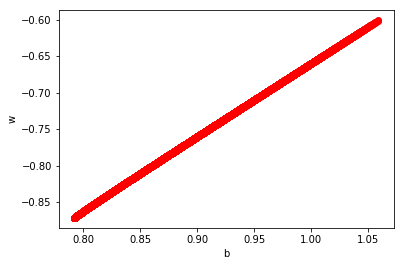

In [11]:
plt.plot(b_history, w_history, 'o-', color = 'red')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

# Visualiaze the Loss
The loss value stopped changing dramatically after the second iteration so I only plotted the first 10 iterations.

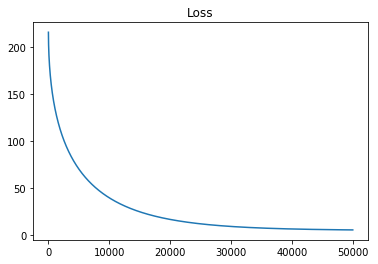

In [12]:
# visualize the loss
fig = plt.figure()
plt.title("Loss")
plt.plot(range(0,iteration), loss_history[0:iteration])    
plt.show()

# Denomalize *w* and *b*

In [13]:
def denomalization(x, y, w, b):
    A = max(y)-min(y)
    B = max(x)-min(x)
    den_w = (w*A)/B
    den_b = -1*((A*w*min(x))/B)+(A*b)+min(y)
    return den_w, den_b

In [14]:
x_output = att['Salnty'].loc[:batchSize].tolist()
y_output = att['T_degC'].loc[:batchSize].tolist()

res_w, res_b = denomalization(x_output, y_output, w, b)
res_w, res_b

(-7.328380330919994, 255.34919785678164)

# Plot the result

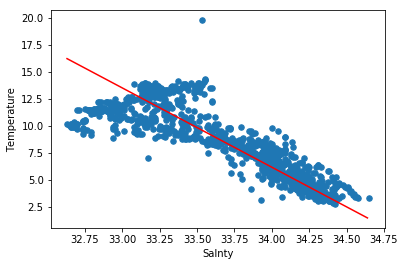

In [15]:
# x_output = att['nor_Salnty'].loc[:batchSize].tolist()
# y_output = att['T_degC'].loc[:batchSize].tolist()

plt.scatter(x_output, y_output, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')

x_ = np.arange(min(x_output), max(x_output), 0.01)
y_ = res_w*x_ + res_b

# predicted fucntion 
plt.plot(x_, y_, color = 'red')
plt.show()